This Notebook is for customer churn data from IDM. 

# Customer Churn Analysis for IDM

This notebook analyzes customer churn data from IDM using the Telco Customer Churn dataset. It includes data exploration, visualization, preprocessing, and the application of various machine learning models to predict customer churn. The goal is to gain insights into the factors influencing churn and to build predictive models for effective customer retention strategies.

In [1]:
pip install plotly xgboost lightgbm shap yellowbrick statsmodels missingno catboost altair


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [4]:
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt

The dataset is loaded into a pandas DataFrame from the CSV file 'WA_Fn-UseC_-Telco-Customer-Churn.csv'. This dataset contains information about IDM's customers, including demographic details, account information, services subscribed, and whether the customer has churned. The DataFrame `df` has 7043 rows and 21 columns, with features such as gender, tenure, contract type, payment method, and churn status.

In [5]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [10]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [14]:
(df['tenure'] == 0).sum()

np.int64(11)

In [15]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [16]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [18]:
columns = df.columns
print("******************* Numeric field *******************\n")
for i in range(len(columns)):
    if df[columns[i]].dtypes!=object:
        print("unique number of {} -> {}".format(columns[i], len(df[columns[i]].unique())))

print("\n******************* Categorical field *******************\n")
for i in range(len(columns)):
    if df[columns[i]].dtypes==object:
        print("unique number of {} -> {}".format(columns[i], len(df[columns[i]].unique())))

******************* Numeric field *******************

unique number of tenure -> 72
unique number of MonthlyCharges -> 1584
unique number of TotalCharges -> 6530

******************* Categorical field *******************

unique number of gender -> 2
unique number of SeniorCitizen -> 2
unique number of Partner -> 2
unique number of Dependents -> 2
unique number of PhoneService -> 2
unique number of MultipleLines -> 3
unique number of InternetService -> 3
unique number of OnlineSecurity -> 3
unique number of OnlineBackup -> 3
unique number of DeviceProtection -> 3
unique number of TechSupport -> 3
unique number of StreamingTV -> 3
unique number of StreamingMovies -> 3
unique number of Contract -> 3
unique number of PaperlessBilling -> 2
unique number of PaymentMethod -> 4
unique number of Churn -> 2


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [20]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [21]:
sns.set(style = 'white')
import os

<Axes: >

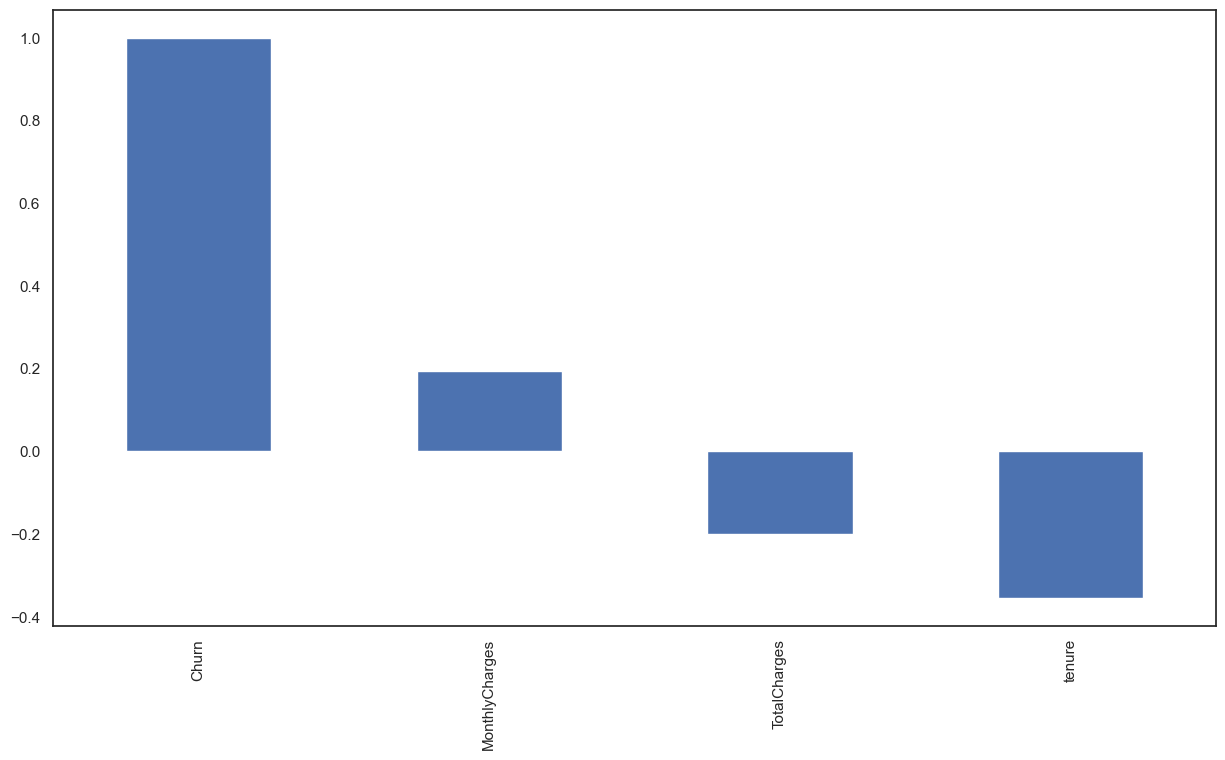

In [22]:
# Convert 'Churn' to numeric for correlation calculation
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

# Select only numeric columns for correlation
numeric_cols = df_corr.select_dtypes(include=[np.number])
plt.figure(figsize=(15,8))
numeric_cols.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [23]:
fig = px.histogram(df, x="Churn", color="Churn", title="Customer Churn Count", barmode='group')
fig.update_traces(marker_line_width=1, marker_line_color='black')
fig.update_layout(
  xaxis_title="Churn",
  yaxis_title="Count",
  showlegend=False,
  bargap=0.4,
  width=1000,
  height=500
)
fig.show()

print(df['Churn'].value_counts())

Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [24]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.8, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [25]:
# Filter for churned and non-churned customers using string values
churn_yes = df[df['Churn'] == 'Yes']
churn_no = df[df['Churn'] == 'No']

# Percentage of male and female in churn=yes group
gender_churn_yes_counts = churn_yes['gender'].value_counts()
gender_churn_yes_percentages = gender_churn_yes_counts / len(churn_yes) * 100

print("Percentage of Male and Female in Churn=Yes group:")
print(gender_churn_yes_percentages)

print("\n" + "="*30 + "\n") # Separator

# Percentage of male and female in churn=no group
gender_churn_no_counts = churn_no['gender'].value_counts()
gender_churn_no_percentages = gender_churn_no_counts / len(churn_no) * 100

print("Percentage of Male and Female in Churn=No group:")
print(gender_churn_no_percentages)

Percentage of Male and Female in Churn=Yes group:
gender
Female    50.24077
Male      49.75923
Name: count, dtype: float64


Percentage of Male and Female in Churn=No group:
gender
Male      50.726322
Female    49.273678
Name: count, dtype: float64


In [26]:
# Calculate the total number of male and female customers
total_male = df[df['gender'] == 'Male'].shape[0]
total_female = df[df['gender'] == 'Female'].shape[0]

# Calculate the number of churned male and female customers
churned_male = df[(df['gender'] == 'Male') & (df['Churn'] == 'Yes')].shape[0]
churned_female = df[(df['gender'] == 'Female') & (df['Churn'] == 'Yes')].shape[0]

# Calculate the churn percentage for male and female customers
churn_percentage_male = (churned_male / total_male) * 100
churn_percentage_female = (churned_female / total_female) * 100

print(f"{churn_percentage_male:.2f}% male customers actually churned")
print(f"{churn_percentage_female:.2f}% female customers actually churned")

26.20% male customers actually churned
26.96% female customers actually churned


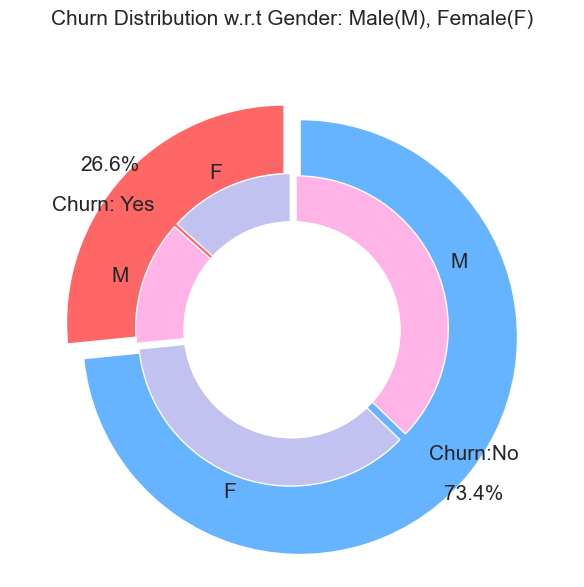

In [27]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.5,0.5)
explode_gender = (0.2,0.2,0.2,0.2)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

In [28]:
contract_churn_percentage = df.groupby('Contract')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by Contract Type:")
print(contract_churn_percentage)

Churn percentage by Contract Type:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


In [29]:
# Filter for month-to-month customers who churned
mtm_churned = df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'Yes')]

# Calculate the average tenure (lifetime in months)
average_lifetime_mtm_churned = mtm_churned['tenure'].mean()
print(f"Average lifetime (in months) of month-to-month customers who churned: {average_lifetime_mtm_churned:.2f}")

Average lifetime (in months) of month-to-month customers who churned: 14.02


In [30]:
# Calculate average monthly charges for each contract type
avg_monthly_charges_by_contract = df.groupby('Contract')['MonthlyCharges'].mean()
print("Average Monthly Charges by Contract Type:")
print(avg_monthly_charges_by_contract)

Average Monthly Charges by Contract Type:
Contract
Month-to-month    66.398490
One year          65.079416
Two year          60.872374
Name: MonthlyCharges, dtype: float64


In [31]:
avg_monthly_charges_mtm_churned = mtm_churned['MonthlyCharges'].mean()
print(f"Average Monthly Charges for month-to-month customers who churned: {avg_monthly_charges_mtm_churned:.2f}")

Average Monthly Charges for month-to-month customers who churned: 73.02


In [32]:
# Filter for month-to-month customers who churned and have MonthlyCharges > 65.08
mtm_churned_high_cost = df[(df['Contract'] == 'Month-to-month') & 
               (df['Churn'] == 'Yes') & 
               (df['MonthlyCharges'] >69)] 

# Total month-to-month customers
total_mtm = df[df['Contract'] == 'Month-to-month'].shape[0]

# Percentage calculation
percentage = (mtm_churned_high_cost.shape[0] / total_mtm) * 100

print(f"Percentage of month-to-month contract customers who churned and whose monthly cost is more than 65.08: {percentage:.2f}%")

Percentage of month-to-month contract customers who churned and whose monthly cost is more than 65.08: 30.12%


In [33]:
# Filter for month-to-month customers who did not churn
mtm_not_churned = df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'No')]

# Calculate the average monthly charges
avg_monthly_charges_mtm_not_churned = mtm_not_churned['MonthlyCharges'].mean()
print(f"Average Monthly Charges for month-to-month customers who did not churn: {avg_monthly_charges_mtm_not_churned:.2f}")

Average Monthly Charges for month-to-month customers who did not churn: 61.46


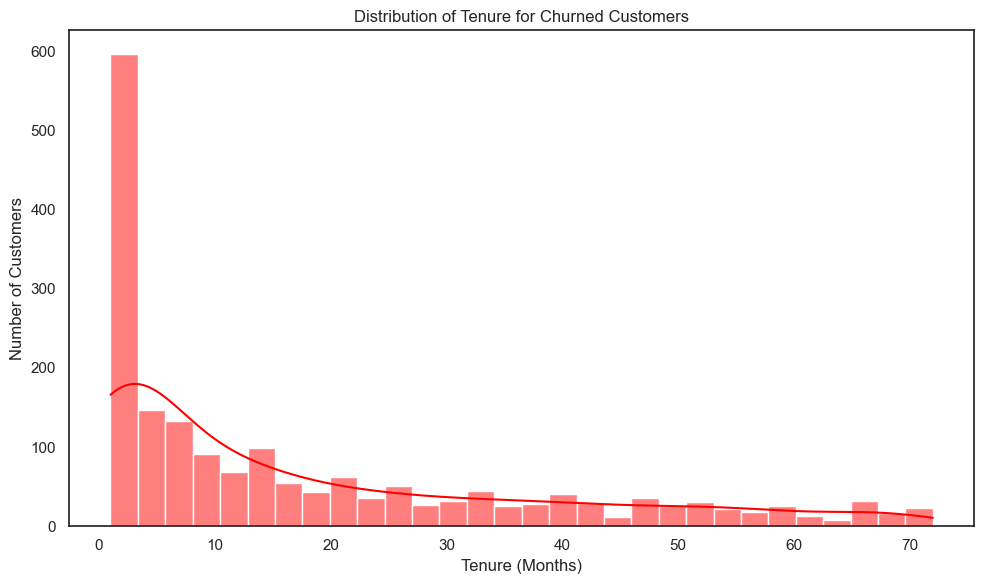

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(churn_yes['tenure'], bins=30, kde=True, color='red')
plt.title('Distribution of Tenure for Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [35]:
tenure_counts = df['tenure'].value_counts().sort_index()  # sort so it appears in order
# Create a DataFrame for plotting
tenure_df = pd.DataFrame({
    'Tenure': tenure_counts.index,
    'CustomerCount': tenure_counts.values
})

# Create bar plot
fig = px.bar(
    tenure_df,
    x='Tenure',
    y='CustomerCount',
    labels={'Tenure': 'Customer Tenure (in months)', 'CustomerCount': 'Number of Customers'},
    title='Customer Distribution by Tenure',
    text_auto=True
)

fig.update_layout(
    #xaxis=dict(tickmode='linear'),
    width=1400,
    height=500
)

fig.show()

In [36]:
month_to_month_df = df[df['Contract'] == 'Month-to-month']
fig = px.histogram(
    month_to_month_df,
    x='tenure',
    nbins=30,
    title='Distribution of Tenure for Month-to-Month Contract Customers',
    labels={'tenure': 'Tenure (in months)', 'count': 'Number of Customers'},
    color_discrete_sequence=['#636EFA']
)

fig.update_layout(
    bargap=0.1,
    width=800,
    height=500
)

fig.show()

In [37]:
# Filter for month-to-month customers who churned with tenure <= 12 months
mtm_churned_early = df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'Yes') & (df['tenure'] <= 12)]

# Calculate the percentage
percentage_early_churn = (mtm_churned_early.shape[0] / total_mtm) * 100

print(f"Percentage of month-to-month customers who churned at or before 12 months tenure: {percentage_early_churn:.2f}%")

Percentage of month-to-month customers who churned at or before 12 months tenure: 26.43%


In [38]:
# Filter for month-to-month customers who churned with tenure <= 24 months
mtm_churned_24 = df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'Yes') & (df['tenure'] <= 24)]

# Calculate the percentage
percentage_churn_24 = (mtm_churned_24.shape[0] / total_mtm) * 100

print(f"Percentage of month-to-month customers who churned at or before 24 months tenure: {percentage_churn_24:.2f}%")

Percentage of month-to-month customers who churned at or before 24 months tenure: 33.60%


In [39]:
# Filter for month-to-month customers who churned and have MonthlyCharges < 60.87
mtm_churned_low_cost = df[(df['Contract'] == 'Month-to-month') & 
              (df['Churn'] == 'Yes') & 
              (df['MonthlyCharges'] < 60.87)]

# Percentage calculation
percentage_low_cost = (mtm_churned_low_cost.shape[0] / total_mtm) * 100

print(f"Percentage of month-to-month customers who churned and whose monthly cost is less than 60.87: {percentage_low_cost:.2f}%")

Percentage of month-to-month customers who churned and whose monthly cost is less than 60.87: 11.77%


In [40]:
# Calculate the percentage of customers by contract type
contract_counts = df['Contract'].value_counts(normalize=True) * 100
print("Percentage of customers by contract type:")
print(contract_counts)

Percentage of customers by contract type:
Contract
Month-to-month    55.105233
Two year          23.961889
One year          20.932878
Name: proportion, dtype: float64


In [41]:
# Step 1: Filter month-to-month churned customers who left within 12 months
churned_mtm_12 = df[
    (df['Contract'] == 'Month-to-month') &
    (df['Churn'] == 'Yes') &
    (df['tenure'] <= 12)
].copy()

# Calculate revenue for each
churned_mtm_12['revenue'] = churned_mtm_12['tenure'] * churned_mtm_12['MonthlyCharges']

# Total and average revenue
total_revenue_churned_mtm_12 = churned_mtm_12['revenue'].sum()
avg_revenue_churned_mtm_12 = churned_mtm_12['revenue'].mean()
num_customers_churned_mtm_12 = churned_mtm_12.shape[0]

print(f"Churned month-to-month customers within 12 months: {num_customers_churned_mtm_12}")
print(f"Total revenue from them: ${total_revenue_churned_mtm_12:.2f}")
print(f"Average revenue per churned customer: ${avg_revenue_churned_mtm_12:.2f}")


Churned month-to-month customers within 12 months: 1024
Total revenue from them: $293412.00
Average revenue per churned customer: $286.54


In [42]:
# Step 2: One-year contract customers who did NOT churn and had full tenure (assume full = 12 months+)
one_year_full = df[
    (df['Contract'] == 'One year') &
    (df['tenure'] >= 12)
].copy()

# Revenue = 12 * monthly charges (assuming they stayed 12 months)
one_year_full['revenue'] = 12 * one_year_full['MonthlyCharges']

# Total and average revenue
total_revenue_one_year = one_year_full['revenue'].sum()
avg_revenue_one_year = one_year_full['revenue'].mean()
num_customers_one_year = one_year_full.shape[0]

print(f"One-year customers (12+ months): {num_customers_one_year}")
print(f"Total revenue from them: ${total_revenue_one_year:.2f}")
print(f"Average revenue per customer: ${avg_revenue_one_year:.2f}")


One-year customers (12+ months): 1371
Total revenue from them: $1109071.20
Average revenue per customer: $808.95


In [43]:
one_year_less = df[
    (df['Contract'] == 'One year') &
    (df['tenure'] < 12)
].copy()

num_customers_one_year_less = one_year_less.shape[0]
print(f"One-year customers (less than 12 months): {num_customers_one_year_less}")

One-year customers (less than 12 months): 101


In [44]:
one_year_less_churned = one_year_less[one_year_less['Churn'] == 'Yes']
num_one_year_less_churned = one_year_less_churned.shape[0]
print(f"Number of customers with one year contract, tenure < 12, and churned: {num_one_year_less_churned}")

Number of customers with one year contract, tenure < 12, and churned: 8


In [45]:
# Calculate the total charges (cost) for all customers with one year contract, tenure < 12, and churned
total_cost_one_year_less_churned = one_year_less_churned['TotalCharges'].sum()
print(f"Total charges for one year contract customers with tenure < 12 who churned: ${total_cost_one_year_less_churned:.2f}")

Total charges for one year contract customers with tenure < 12 who churned: $2062.20


In [46]:
num_customers_one_year = one_year_full.shape[0] + one_year_less.shape[0]
print(f"Total number of customers with one year contract: {num_customers_one_year}")

Total number of customers with one year contract: 1472


In [47]:
# Calculate the percentage of customers who churned before 12 months tenure
churned_before_12 = df[(df['Churn'] == 'Yes') & (df['tenure'] < 12)]
percentage_churned_before_12 = (churned_before_12.shape[0] / df.shape[0]) * 100

print(f"Percentage of people who churned before 12 months tenure: {percentage_churned_before_12:.2f}%")

Percentage of people who churned before 12 months tenure: 14.21%


In [48]:
# Calculate the percentage of month-to-month customers who churned before 12 months tenure
mtm_total = df[df['Contract'] == 'Month-to-month'].shape[0]
mtm_churned_before_12 = df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'Yes') & (df['tenure'] <= 12)].shape[0]
percentage_mtm_churned_before_12 = (mtm_churned_before_12 / mtm_total) * 100

print(f"Percentage of month-to-month customers who churned before 12 months tenure: {percentage_mtm_churned_before_12:.2f}%")

Percentage of month-to-month customers who churned before 12 months tenure: 26.43%


In [49]:
# Filter customers who did not churn and tenure is <= 12
not_churned_tenure_12 = df[(df['Churn'] == 'No') & (df['tenure'] <= 12)]
num_not_churned_tenure_12 = not_churned_tenure_12.shape[0]
print(f"Number of customers who didn't churn and tenure is <= 12: {num_not_churned_tenure_12}")

Number of customers who didn't churn and tenure is <= 12: 1138


In [50]:
# Number of customers with tenure=1 who churned
tenure_1_churn = df[(df['tenure'] == 1) & (df['Churn'] == 'Yes')].shape[0]

# Number of customers with tenure=1 who did not churn
tenure_1_no_churn = df[(df['tenure'] == 1) & (df['Churn'] == 'No')].shape[0]

print(f"Customers with tenure=1 and churned: {tenure_1_churn}")
print(f"Customers with tenure=1 and did not churn: {tenure_1_no_churn}")

Customers with tenure=1 and churned: 380
Customers with tenure=1 and did not churn: 233


In [51]:
# Number of customers with tenure=2 who churned
tenure_2_churn = df[(df['tenure'] == 2) & (df['Churn'] == 'Yes')].shape[0]

# Number of customers with tenure=2 who did not churn
tenure_2_no_churn = df[(df['tenure'] == 2) & (df['Churn'] == 'No')].shape[0]

print(f"Customers with tenure=2 and churned: {tenure_2_churn}")
print(f"Customers with tenure=2 and did not churn: {tenure_2_no_churn}")

Customers with tenure=2 and churned: 123
Customers with tenure=2 and did not churn: 115


In [52]:
# Calculate the percentage of customers who churned and whose MonthlyCharges < 60
churned_low_monthly = df[(df['Churn'] == 'Yes') & (df['MonthlyCharges'] < 50)]
percentage_churned_low_monthly = (churned_low_monthly.shape[0] / df[df['Churn'] == 'Yes'].shape[0]) * 100

print(f"Percentage of customers who churned and whose monthly charge is less than 60: {percentage_churned_low_monthly:.2f}%")

Percentage of customers who churned and whose monthly charge is less than 60: 19.32%


In [53]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [54]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [55]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [56]:
contract_churn_percentage = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by Contract Type:")
print(contract_churn_percentage)

Churn percentage by Contract Type:
Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


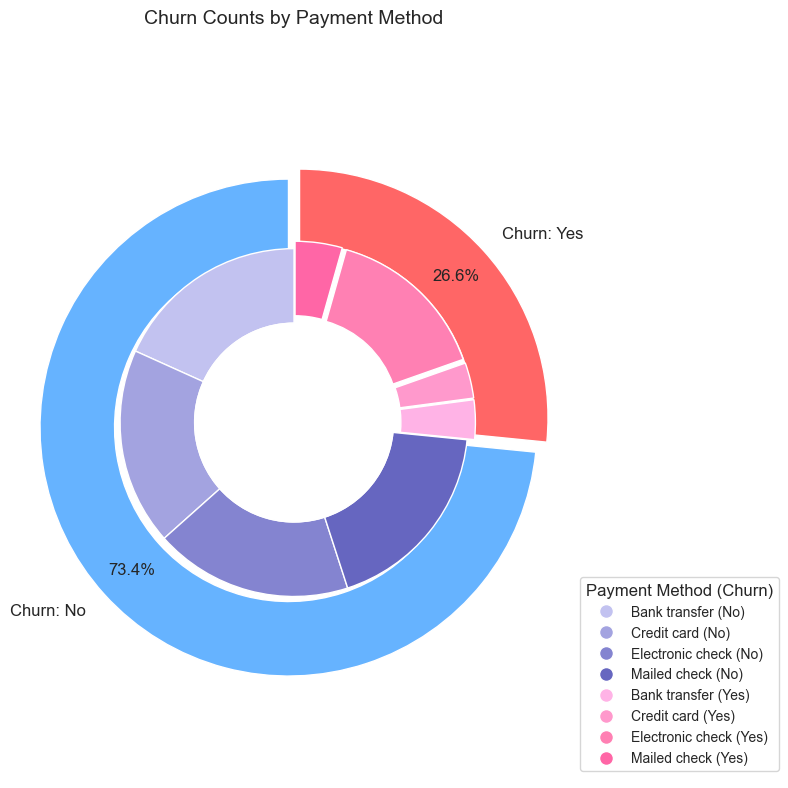

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

# Outer pie: total churn yes/no
labels_churn = ["Churn: No", "Churn: Yes"]
values_churn = [1284 + 1289 + 1294 + 1296, 258 + 232 + 1071 + 308]
colors_churn = ['#66b3ff', '#ff6666']
explode_churn = (0.3, 0.3)
textprops = {"fontsize": 12}

# Inner pie: payment method distribution within churn No and Yes separately
sizes_no = [1284, 1289, 1294, 1296]
sizes_yes = [258, 232, 1071, 308]

colors_no = ['#c2c2f0', '#a3a3e0', '#8484d0', '#6666c0']
colors_yes = ['#ffb3e6', '#ff99cc', '#ff80b3', '#ff66a6']

sizes_payment = sizes_no + sizes_yes
labels_payment = ["Bank transfer (No)", "Credit card (No)", "Electronic check (No)", "Mailed check (No)",
                  "Bank transfer (Yes)", "Credit card (Yes)", "Electronic check (Yes)", "Mailed check (Yes)"]
colors_payment = colors_no + colors_yes
explode_payment = (0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.3, 0.3)  # Slightly explode Yes slices

# Plot outer pie chart without labels inside
plt.pie(
    values_churn,
    labels=labels_churn,  # No labels inside
    autopct='%1.1f%%',
    pctdistance=0.85,
    colors=colors_churn,
    startangle=90,
    explode=explode_churn,
    radius=10,
    textprops=textprops,
    counterclock=True,
    wedgeprops=dict(width=3, edgecolor='w')
)

# Plot inner pie chart without labels inside
plt.pie(
    sizes_payment,
    labels=None,  # No labels inside
    colors=colors_payment,
    startangle=90,
    explode=explode_payment,
    radius=7,
    textprops=textprops,
    counterclock=True,
    wedgeprops=dict(width=3, edgecolor='w')
)

# Draw center circle for donut effect
centre_circle = plt.Circle((0, 0), 4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Counts by Payment Method', fontsize=14, y=1.05)
plt.axis('equal')

# Clear previous legends
plt.gca().legend_.remove() if plt.gca().legend_ else None

# Add churn legend with correct colors
churn_handles = [plt.Line2D([0], [0], marker='o', color='w', label=labels_churn[i],
                            markerfacecolor=colors_churn[i], markersize=15) for i in range(len(labels_churn))]
plt.legend(handles=churn_handles, loc='upper left', bbox_to_anchor=(1, 1), title="Churn Status", fontsize=12)

# Add payment method legend with correct colors
payment_handles = [plt.Line2D([0], [0], marker='o', color='w', label=labels_payment[i],
                              markerfacecolor=colors_payment[i], markersize=10) for i in range(len(labels_payment))]
plt.legend(handles=payment_handles, loc='lower left', bbox_to_anchor=(1, 0), title="Payment Method (Churn)", fontsize=10)

plt.tight_layout()
plt.show()


In [58]:
num_electronic_payment = df[df['PaymentMethod'] == 'Electronic check'].shape[0]
print(f"Number of customers with electronic payment method: {num_electronic_payment}")

Number of customers with electronic payment method: 2365


In [59]:
contract_churn_percentage = df.groupby('InternetService')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by Contract Type:")
print(contract_churn_percentage)

Churn percentage by Contract Type:
Churn                   No        Yes
InternetService                      
DSL              81.001656  18.998344
Fiber optic      58.107235  41.892765
No               92.565789   7.434211


In [60]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

In [61]:
Dependents_churn_percentage = df.groupby('Dependents')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by dependent Type:")
print(Dependents_churn_percentage)

Churn percentage by dependent Type:
Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.468795  15.531205


In [62]:
partner_churn_percentage = df.groupby('Partner')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by partner Type:")
print(partner_churn_percentage)

Churn percentage by partner Type:
Churn           No        Yes
Partner                      
No       67.023908  32.976092
Yes      80.282935  19.717065


In [63]:
# Calculate the percentage of customers with/without dependents based on whether they have a partner
partner_dependents = df.groupby(['Partner', 'Dependents']).size().unstack(fill_value=0)
partner_totals = partner_dependents.sum(axis=1)
partner_dependents_percentage = partner_dependents.div(partner_totals, axis=0) * 100

print("Percentage of customers with/without dependents based on whether they have a partner:")
print(partner_dependents_percentage)

Percentage of customers with/without dependents based on whether they have a partner:
Dependents         No        Yes
Partner                         
No          90.134652   9.865348
Yes         48.717949  51.282051


In [64]:
fig = px.bar(
  partner_dependents_percentage.reset_index(),
  x="Partner",
  y=["No", "Yes"],
  labels={"value": "Percentage", "Partner": "Has Partner", "variable": "Has Dependents"},
  title="Percentage of Customers With/Without Dependents Based on Partner Status",
  barmode="stack",
  text_auto='.2f'
)
fig.update_layout(
  yaxis_title="Percentage",
  xaxis_title="Partner",
  legend_title="Dependents",
  width=700,
  height=500
)
fig.show()

In [65]:
Senior_churn_percentage = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by Senior Citizen Type:")
print(Senior_churn_percentage)

Churn percentage by Senior Citizen Type:
Churn                 No        Yes
SeniorCitizen                      
No             76.349745  23.650255
Yes            58.318739  41.681261


In [66]:
# Filter for senior citizens with dependents
senior_with_dependents = df[(df['SeniorCitizen'] == 'Yes') & (df['Dependents'] == 'Yes')]
num_senior_with_dependents = senior_with_dependents.shape[0]

# Total number of senior citizens
total_senior = df[df['SeniorCitizen'] == 'Yes'].shape[0]

# Percentage calculation
percentage_senior_with_dependents = (num_senior_with_dependents / total_senior) * 100 if total_senior > 0 else 0

print(f"Number of senior citizens with dependents: {num_senior_with_dependents}")
print(f"Percentage of senior citizens with dependents: {percentage_senior_with_dependents:.2f}%")

Number of senior citizens with dependents: 91
Percentage of senior citizens with dependents: 7.97%


In [67]:
# Number of senior citizens with a partner
senior_with_partner = df[(df['SeniorCitizen'] == 'Yes') & (df['Partner'] == 'Yes')]
num_senior_with_partner = senior_with_partner.shape[0]

# Percentage calculation
percentage_senior_with_partner = (num_senior_with_partner / total_senior) * 100 if total_senior > 0 else 0

print(f"Number of senior citizens with a partner: {num_senior_with_partner}")
print(f"Percentage of senior citizens with a partner: {percentage_senior_with_partner:.2f}%")

Number of senior citizens with a partner: 573
Percentage of senior citizens with a partner: 50.18%


In [68]:
online_security_churn_percentage = df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by online securityType:")
print(online_security_churn_percentage)

Churn percentage by online securityType:
Churn                       No        Yes
OnlineSecurity                           
No                   58.221333  41.778667
No internet service  92.565789   7.434211
Yes                  85.359801  14.640199


In [69]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [70]:
contract_churn_percentage = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by Contract Type:")
print(contract_churn_percentage)

Churn percentage by Contract Type:
Churn                    No        Yes
PaperlessBilling                      
No                83.624302  16.375698
Yes               66.410749  33.589251


In [71]:
# Calculate the percentage of PaperlessBilling='Yes' among customers with PaymentMethod='Mailed check'
mailed_check_total = df[df['PaymentMethod'] == 'Mailed check'].shape[0]
mailed_check_paperless_yes = df[(df['PaymentMethod'] == 'Mailed check') & (df['PaperlessBilling'] == 'Yes')].shape[0]
percentage_paperless_yes_mailed_check = (mailed_check_paperless_yes / mailed_check_total) * 100

print(f"Percentage of PaperlessBilling='Yes' among Mailed check payment: {percentage_paperless_yes_mailed_check:.2f}%")

Percentage of PaperlessBilling='Yes' among Mailed check payment: 40.84%


In [72]:
num_paperless_billing = df[df['PaperlessBilling'] == 'Yes'].shape[0]
num_online_security = df[df['OnlineSecurity'] == 'Yes'].shape[0]

print(f"Number of customers with Paperless Billing: {num_paperless_billing}")
print(f"Number of customers with Online Security: {num_online_security}")

Number of customers with Paperless Billing: 4168
Number of customers with Online Security: 2015


In [73]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [74]:
techsupport_churn_percentage = df.groupby('TechSupport')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by Tech Support Type:")
print(techsupport_churn_percentage)

Churn percentage by Tech Support Type:
Churn                       No        Yes
TechSupport                              
No                   58.352535  41.647465
No internet service  92.565789   7.434211
Yes                  84.803922  15.196078


In [75]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [76]:
phoneservice_churn_percentage = df.groupby('PhoneService')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by phone service Type:")
print(phoneservice_churn_percentage)

Churn percentage by phone service Type:
Churn                No        Yes
PhoneService                      
No            75.000000  25.000000
Yes           73.252519  26.747481


In [77]:
multilines_churn_percentage = df.groupby('MultipleLines')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by Multiple Lines Type:")
print(multilines_churn_percentage)

Churn percentage by Multiple Lines Type:
Churn                    No        Yes
MultipleLines                         
No                74.918759  25.081241
No phone service  75.000000  25.000000
Yes               71.351534  28.648466


In [78]:
onlinebackup_churn_percentage = df.groupby('OnlineBackup')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by online backup Type:")
print(onlinebackup_churn_percentage)

Churn percentage by online backup Type:
Churn                       No        Yes
OnlineBackup                             
No                   60.058309  39.941691
No internet service  92.565789   7.434211
Yes                  78.432990  21.567010


In [79]:
deviceprotection_churn_percentage = df.groupby('DeviceProtection')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by Device Protection Type:")
print(deviceprotection_churn_percentage)

Churn percentage by Device Protection Type:
Churn                       No        Yes
DeviceProtection                         
No                   60.859729  39.140271
No internet service  92.565789   7.434211
Yes                  77.460711  22.539289


In [80]:
streamingTV_churn_percentage = df.groupby('StreamingTV')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by StreamingTV Type:")
print(streamingTV_churn_percentage)

Churn percentage by StreamingTV Type:
Churn                       No        Yes
StreamingTV                              
No                   66.464934  33.535066
No internet service  92.565789   7.434211
Yes                  69.885313  30.114687


In [81]:
streamingMovies_churn_percentage = df.groupby('StreamingMovies')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by streaming movies Type:")
print(streamingMovies_churn_percentage)

Churn percentage by streaming movies Type:
Churn                       No        Yes
StreamingMovies                          
No                   66.271125  33.728875
No internet service  92.565789   7.434211
Yes                  70.047602  29.952398


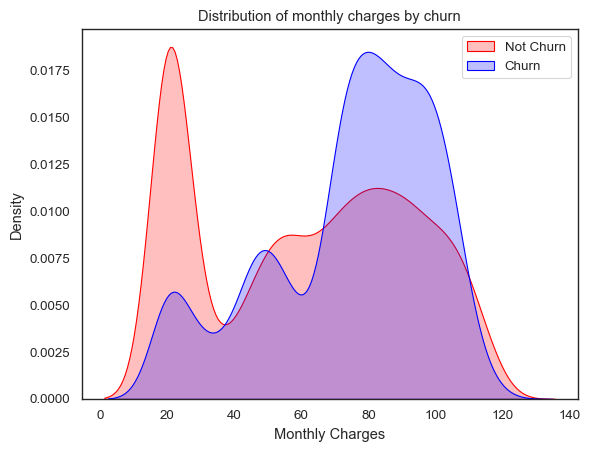

In [82]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');


In [155]:
# Distribution of monthly charges using KDE plot
import plotly.figure_factory as ff

fig = ff.create_distplot([df['MonthlyCharges']], ['Monthly Charges'], 
                        bin_size=2, show_hist=False, show_rug=False)
fig.update_layout(
    title='Distribution of Monthly Charges (KDE)',
    xaxis_title='Monthly Charges',
    yaxis_title='Density',
    width=800,
    height=500
)
fig.show()

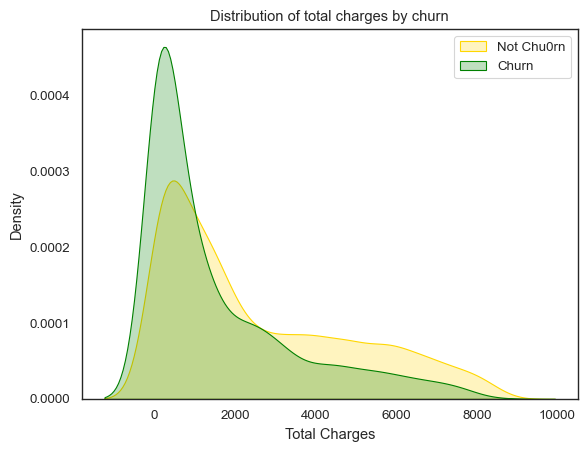

In [83]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [84]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()


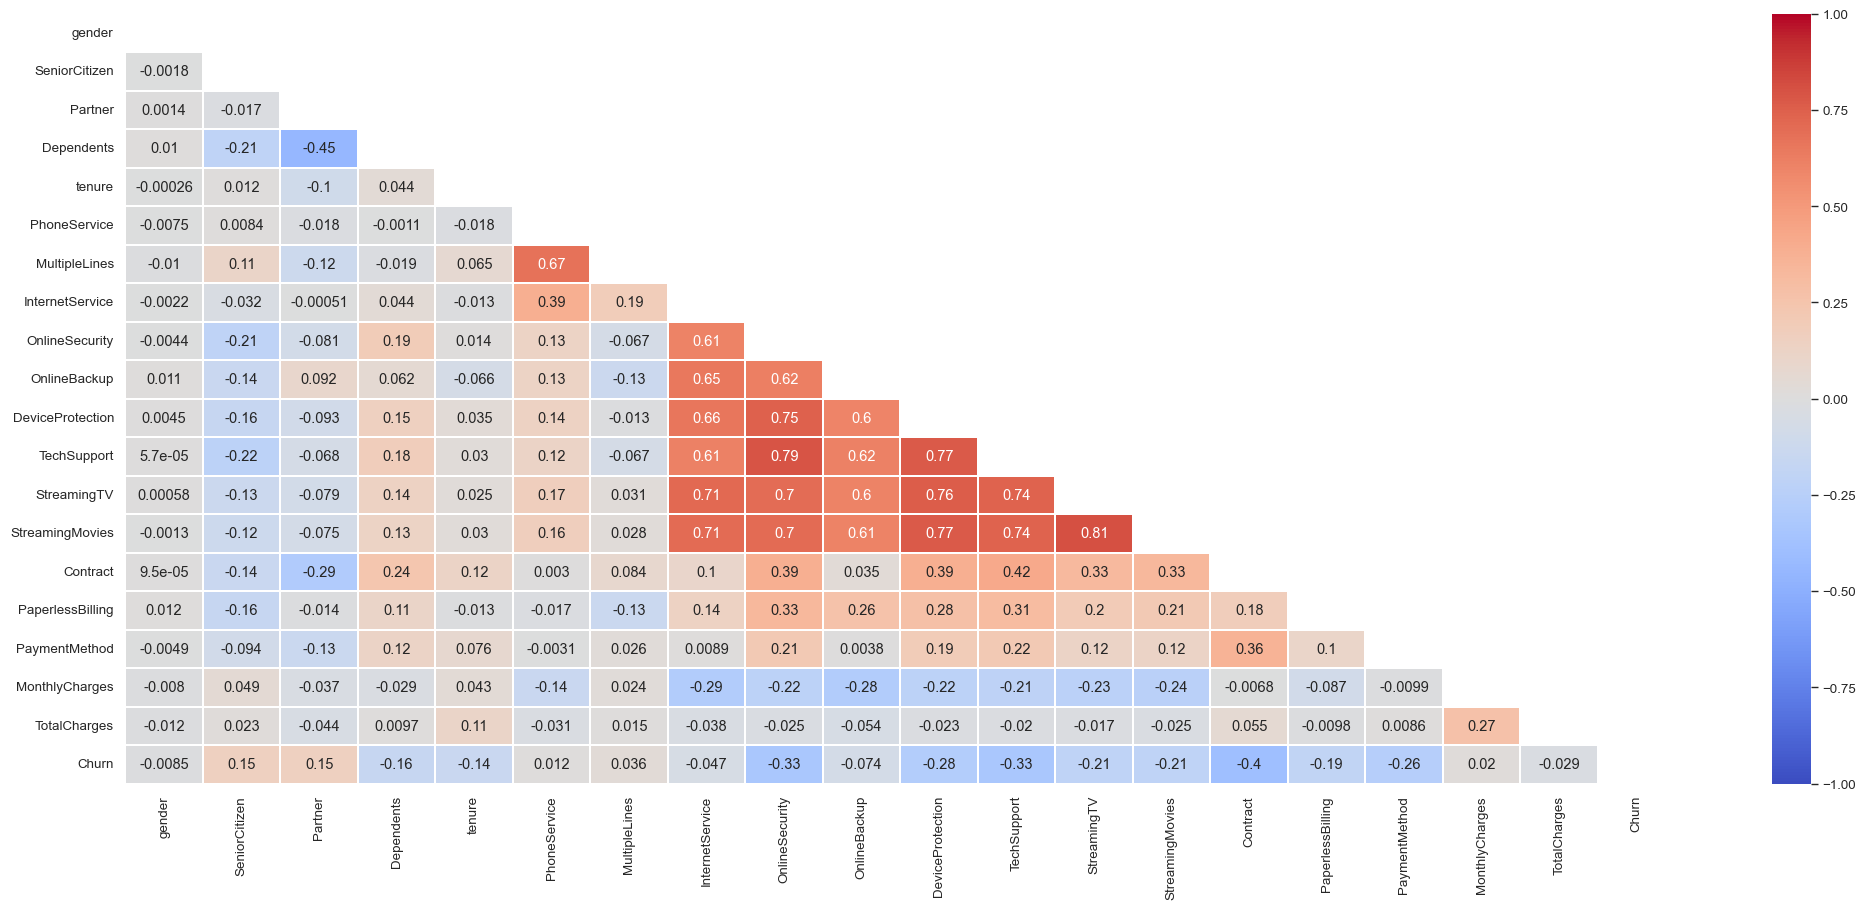

In [85]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [86]:
#df.Acquisition = (df['tenure'] <= 3)
#Churn = df.Churn.value_counts().values
#Acquisition = df.Acquisition.value_counts().values
#index = ['No', 'Yes']
#pd.DataFrame({'Churn':Churn, 'Acquisition':Acquisition}, index=index).plot(kind='bar', figsize=(10, 5), title='Churn vs Acquisition', color=['#66b3ff', '#ff6666'])

In [87]:
dependent   = ['Churn']
identifier  = ['CustomerID']
numerical   = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical = [col for col in df.columns if col not in numerical + dependent + identifier]

internet_add_on = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
phone_add_on = ['MultipleLines']


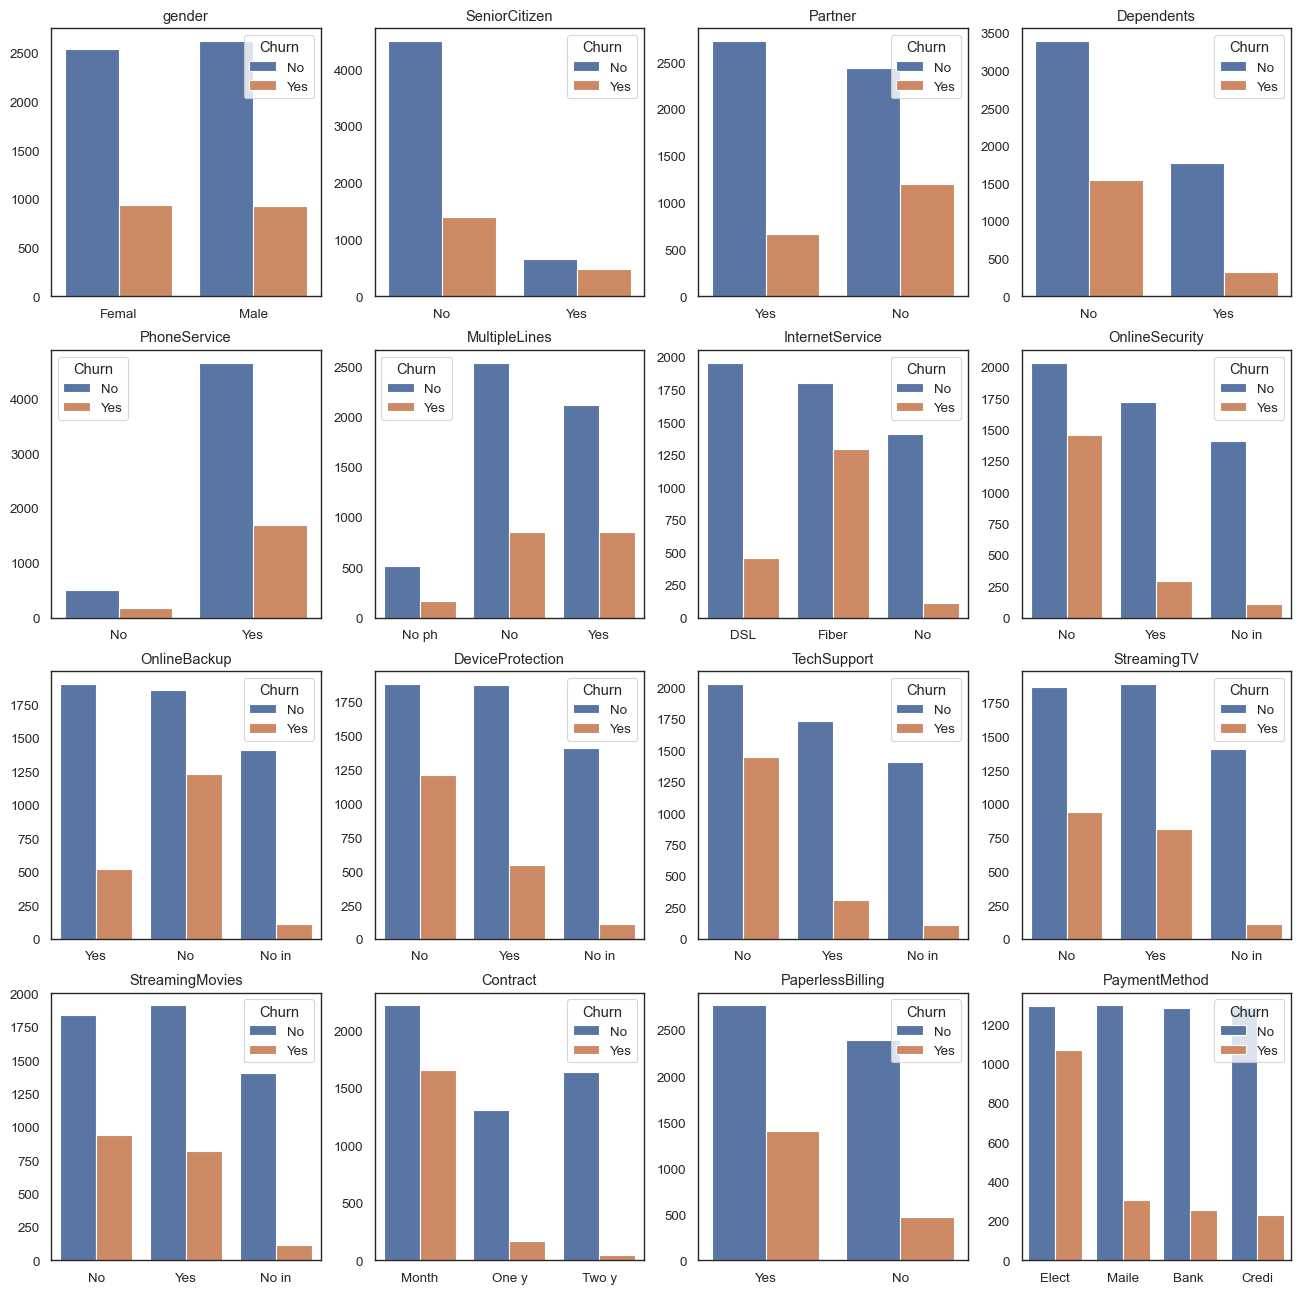

In [88]:
fig, axes = plt.subplots(nrows = 4,ncols = 4,figsize = (16, 16))
# Selecting and plotting the data, inputting them into the matrix.
for i, item in enumerate(categorical):
    if item in internet_add_on: 
        df1 = df[df['InternetService'] != 'No']
    elif item in phone_add_on: 
        df1 = df[df['PhoneService'] != 'No']
    else: df = df
    if i < 4:
        ax = sns.countplot(data=df, x=item, hue='Churn',
        ax=axes[0, i])
    elif i >=4 and i < 8:
        ax = sns.countplot(data=df, x=item, hue='Churn',
        ax=axes[1, i-4])
    elif i >=8 and i < 12:
        ax = sns.countplot(data=df, x=item, hue='Churn',
        ax=axes[2, i-8])
    elif i < 16:
        ax = sns.countplot(data=df, x=item, hue='Churn',
        ax=axes[3, i-12])
# Limiting characters to 5 and setting the title on top.
    ax.set_title(item)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_xticklabels(item.get_text()[:5] for item in
    ax.get_xticklabels())

In [89]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [90]:
# Check required columns exist
df[['PaperlessBilling', 'PaymentMethod', 'InternetService', 'MonthlyCharges']].head()
df[df['PaperlessBilling'] == 'Yes']['MonthlyCharges'].describe()
df.groupby('PaperlessBilling')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
PaperlessBilling,,,,,,,,
No,2864.0,52.025960,29.705423,18.25,20.45,50.2,78.20,118.60
Yes,4168.0,73.574532,27.052794,18.55,54.95,79.5,94.95,118.75


In [91]:
df[df['PaymentMethod'] == 'Electronic check']['MonthlyCharges'].describe()
df.groupby('PaymentMethod')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
PaymentMethod,,,,,,,,
Bank transfer (automatic),1542.0,67.205577,30.572447,18.40,41.0625,73.250,92.9875,118.75
Credit card (automatic),1521.0,66.519264,30.621316,18.25,38.6000,73.050,90.8500,117.50
Electronic check,2365.0,76.255814,24.053655,18.85,60.1500,80.550,94.7000,118.65
Mailed check,1604.0,43.958354,26.318624,18.70,20.1500,34.875,64.9125,118.60


In [92]:
df[df['InternetService'].isin(['DSL', 'Fiber optic'])].groupby('InternetService')['MonthlyCharges'].describe()


,count,mean,std,min,25%,50%,75%,max
InternetService,,,,,,,,
DSL,2416.0,58.088017,16.266167,23.45,46.0875,56.150,69.8625,94.80
Fiber optic,3096.0,91.500129,12.663039,67.75,80.5500,91.675,101.1500,118.75


In [93]:
filtered_df = df[
    (df['PaperlessBilling'] == 'Yes') &
    (df['PaymentMethod'] == 'Electronic check') &
    (df['InternetService'].isin(['DSL', 'Fiber optic']))
]

filtered_df['MonthlyCharges'].describe()


count    1692.000000
mean       81.238416
std        20.367404
min        23.450000
25%        70.287500
50%        84.775000
75%        96.212500
max       118.650000
Name: MonthlyCharges, dtype: float64

In [94]:
# Calculate average monthly charges for each category
mean_monthly_charges = {
    'Paperless Billing (Yes)': df[df['PaperlessBilling'] == 'Yes']['MonthlyCharges'].mean(),
    'Paperless Billing (No)': df[df['PaperlessBilling'] == 'No']['MonthlyCharges'].mean(),
    'Payment: Electronic Check': df[df['PaymentMethod'] == 'Electronic check']['MonthlyCharges'].mean(),
    'Internet: DSL': df[df['InternetService'] == 'DSL']['MonthlyCharges'].mean(),
    'Internet: Fiber Optic': df[df['InternetService'] == 'Fiber optic']['MonthlyCharges'].mean()
}

# Convert to DataFrame
charges_df = pd.DataFrame({
    'Category': list(mean_monthly_charges.keys()),
    'MeanMonthlyCharges': list(mean_monthly_charges.values())
})

# Create bar chart
fig = px.bar(
    charges_df,
    x='Category',
    y='MeanMonthlyCharges',
    title='Average Monthly Charges by Customer Category',
    text_auto='.2f',
    labels={'MeanMonthlyCharges': 'Mean Monthly Charges ($)', 'Category': 'Customer Category'},
    color='Category'
)

fig.update_layout(
    xaxis_tickangle=-30,
    width=800,
    height=500,
    showlegend=False,
    yaxis=dict(title='Average Monthly Charges ($)'),
    xaxis=dict(title='Customer Category')
)

fig.show()


In [125]:
# Average Monthly Charge by Payment Method (print + Plotly chart)

# Compute averages
avg_by_payment = (
    df.groupby('PaymentMethod', as_index=False)['MonthlyCharges']
      .mean()
      .round({'MonthlyCharges': 2})
      .sort_values('MonthlyCharges', ascending=False)
)

# Print neatly
print("Average Monthly Charge by Payment Method ($):")
for _, row in avg_by_payment.iterrows():
    print(f"- {row['PaymentMethod']}: ${row['MonthlyCharges']:.2f}")

# Plotly bar chart
fig = px.bar(
    avg_by_payment,
    x='PaymentMethod',
    y='MonthlyCharges',
    color='PaymentMethod',
    text='MonthlyCharges',
    title='Average Monthly Charges by Payment Method',
    labels={'MonthlyCharges': 'Avg. Monthly Charge ($)', 'PaymentMethod': 'Payment Method'},
)

fig.update_traces(textposition='outside', hovertemplate='PaymentMethod=%{x}<br>Avg Charge=$%{y:.2f}<extra></extra>')
fig.update_layout(
    showlegend=False,
    xaxis_tickangle=-20,
    yaxis=dict(title='Average Monthly Charges ($)')
)

fig.show()

Average Monthly Charge by Payment Method ($):
- Electronic check: $76.26
- Bank transfer (automatic): $67.21
- Credit card (automatic): $66.52
- Mailed check: $43.96


In [95]:
import pandas as pd
import plotly.express as px

# Define extra services
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# 1️⃣ Internet only (no extras)
internet_only = df[
    (df['InternetService'] != 'No') &
    df[services].eq('No').all(axis=1)
]
avg_internet_only = internet_only['MonthlyCharges'].mean()

# 2️⃣ No Internet
no_internet = df[df['InternetService'] == 'No']
avg_no_internet = no_internet['MonthlyCharges'].mean()

# 3️⃣ All Internet Users
internet_users = df[df['InternetService'] != 'No']
avg_all_internet = internet_users['MonthlyCharges'].mean()

# 4️⃣ Internet users with at least 1 extra service
internet_with_services = df[
    (df['InternetService'] != 'No') &
    df[services].eq('Yes').any(axis=1)
]
avg_with_extras = internet_with_services['MonthlyCharges'].mean()

# Build data
services_data = {
    'Service': [
        'Internet Only (No Extras)',
        'Internet + ≥1 Extra Service',
        'Internet Users (Any Type)',
        'No Internet'
    ],
    'AvgMonthlyCharge': [
        avg_internet_only,
        avg_with_extras,
        avg_all_internet,
        avg_no_internet
    ]
}

# Add individual services
for service in services:
    avg_charge = df[df[service] == 'Yes']['MonthlyCharges'].mean()
    services_data['Service'].append(service)
    services_data['AvgMonthlyCharge'].append(avg_charge)

# Convert to DataFrame
comparison_df = pd.DataFrame(services_data)

# 📊 Plotly Bar Chart
fig = px.bar(
    comparison_df,
    x='Service',
    y='AvgMonthlyCharge',
    title='Average Monthly Charges: Internet Services & Extras',
    text_auto='.2f',
    labels={
        'AvgMonthlyCharge': 'Average Monthly Charge ($)',
        'Service': 'Customer Group'
    },
    color='Service'
)

fig.update_layout(
    xaxis_title='Customer Group',
    yaxis_title='Avg Monthly Charge ($)',
    width=1050,
    height=600,
    showlegend=False
)

fig.show()


In [96]:
import pandas as pd
import plotly.express as px

# Define extra services
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# Count No Internet users
no_internet_count = df[df['InternetService'] == 'No'].shape[0]

# Internet users
internet_users = df[df['InternetService'] != 'No']

# Among internet users — Internet Only (no extra services)
internet_only_count = internet_users[internet_users[services].eq('No').all(axis=1)].shape[0]

# Among internet users — With at least 1 extra service
internet_with_services_count = internet_users[internet_users[services].eq('Yes').any(axis=1)].shape[0]

# Combine all
labels = [
    'No Internet',
    'Internet Only (No Extras)',
    'Internet + ≥1 Extra Service'
]
values = [
    no_internet_count,
    internet_only_count,
    internet_with_services_count
]

# Plotly Donut Chart
fig = px.pie(
    names=labels,
    values=values,
    title="Customer Internet Usage & Service Adoption",
    hole=0.4,  # This creates the donut shape
    color=labels,
    color_discrete_map={
        'No Internet': '#b0bec5',
        'Internet Only (No Extras)': '#64b5f6',
        'Internet + ≥1 Extra Service': '#81c784'
    }
)

fig.update_traces(textinfo='label+percent+value', textfont_size=14)

fig.update_layout(
    width=700,
    height=600,
    legend_title="Customer Segment"
)

fig.show()


In [97]:
import plotly.express as px

# Extra services list
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# DSL users
dsl_users = df[df['InternetService'] == 'DSL']
dsl_no_service = dsl_users[dsl_users[services].eq('No').all(axis=1)].shape[0]
dsl_with_service = dsl_users[dsl_users[services].eq('Yes').any(axis=1)].shape[0]

# Fiber optic users
fiber_users = df[df['InternetService'] == 'Fiber optic']
fiber_no_service = fiber_users[fiber_users[services].eq('No').all(axis=1)].shape[0]
fiber_with_service = fiber_users[fiber_users[services].eq('Yes').any(axis=1)].shape[0]

# Combine data
labels = [
    'DSL: No Extra Services',
    'DSL: With ≥1 Extra Service',
    'Fiber: No Extra Services',
    'Fiber: With ≥1 Extra Service'
]
values = [
    dsl_no_service,
    dsl_with_service,
    fiber_no_service,
    fiber_with_service
]

# Donut chart
fig = px.pie(
    names=labels,
    values=values,
    title="Service Adoption by Internet Type (DSL vs Fiber)",
    hole=0.4,
    color=labels,
    color_discrete_map={
        'DSL: No Extra Services': '#ffcc80',
        'DSL: With ≥1 Extra Service': '#ffa726',
        'Fiber: No Extra Services': '#90caf9',
        'Fiber: With ≥1 Extra Service': '#42a5f5'
    }
)

fig.update_traces(textinfo='label+percent+value', textfont_size=13)

fig.update_layout(
    width=750,
    height=600,
    legend_title="Customer Groups"
)

fig.show()


In [98]:
# List of extra services
extra_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies']

# Filter DSL users
dsl_users = df[df['InternetService'] == 'DSL']

# DSL users with at least one extra service
dsl_with_service = dsl_users[dsl_users[extra_services].eq('Yes').any(axis=1)]

# Calculate average MonthlyCharges
avg_monthly_charge_dsl_with_service = dsl_with_service['MonthlyCharges'].mean()

print(f"Average Monthly Charge for DSL users with ≥1 extra service: ${avg_monthly_charge_dsl_with_service:.2f}")


Average Monthly Charge for DSL users with ≥1 extra service: $60.56


In [99]:
# List of extra services
extra_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies']

# Filter Fiber Optic users
fiber_users = df[df['InternetService'] == 'Fiber optic']

# Fiber Optic users with at least one extra service
fiber_with_service = fiber_users[fiber_users[extra_services].eq('Yes').any(axis=1)]

# Calculate average MonthlyCharges
avg_monthly_charge_fiber_with_service = fiber_with_service['MonthlyCharges'].mean()

print(f"Average Monthly Charge for Fiber Optic users with ≥1 extra service: ${avg_monthly_charge_fiber_with_service:.2f}")


Average Monthly Charge for Fiber Optic users with ≥1 extra service: $94.37


In [100]:
# List of extra services
extra_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies']

# DSL users with NO extra services
dsl_no_service = df[
    (df['InternetService'] == 'DSL') &
    (df[extra_services].eq('Yes').sum(axis=1) == 0)
]

# Fiber Optic users with NO extra services
fiber_no_service = df[
    (df['InternetService'] == 'Fiber optic') &
    (df[extra_services].eq('Yes').sum(axis=1) == 0)
]

# Calculate averages
avg_dsl_no_service = dsl_no_service['MonthlyCharges'].mean()
avg_fiber_no_service = fiber_no_service['MonthlyCharges'].mean()

print(f"DSL users with no extra services: ${avg_dsl_no_service:.2f}")
print(f"Fiber Optic users with no extra services: ${avg_fiber_no_service:.2f}")


DSL users with no extra services: $40.28
Fiber Optic users with no extra services: $72.08


In [101]:
# Filter DSL users
dsl_users = df[df['InternetService'] == 'DSL']
dsl_with_phone = dsl_users[dsl_users['PhoneService'] == 'Yes']
dsl_percentage = len(dsl_with_phone) / len(dsl_users) * 100

# Filter Fiber Optic users
fiber_users = df[df['InternetService'] == 'Fiber optic']
fiber_with_phone = fiber_users[fiber_users['PhoneService'] == 'Yes']
fiber_percentage = len(fiber_with_phone) / len(fiber_users) * 100

# Display
print(f"DSL users with phone service: {dsl_percentage:.2f}%")
print(f"Fiber Optic users with phone service: {fiber_percentage:.2f}%")


DSL users with phone service: 71.85%
Fiber Optic users with phone service: 100.00%


In [102]:
internet_df = df[df['InternetService'].isin(['DSL', 'Fiber optic'])]
avg_charges = internet_df.groupby(['InternetService', 'PhoneService'])['MonthlyCharges'].mean().reset_index()
avg_charges.columns = ['InternetService', 'PhoneService', 'AvgMonthlyCharges']
import plotly.express as px

fig = px.bar(
    avg_charges,
    x='InternetService',
    y='AvgMonthlyCharges',
    color='PhoneService',
    barmode='group',
    text_auto='.2f',
    title='Average Monthly Charges: Fiber vs DSL with/without Phone Service'
)

fig.update_layout(
    yaxis_title='Average Monthly Charges ($)',
    xaxis_title='Internet Service Type',
    legend_title='Has Phone Service',
    width=700,
    height=500
)

fig.show()


In [103]:
paperless_avg = df[df['PaperlessBilling'] == 'Yes']['MonthlyCharges'].mean()
print(f"📦 Average Monthly Charges for Paperless Billing users: ${paperless_avg:.2f}")


📦 Average Monthly Charges for Paperless Billing users: $73.57


In [104]:
# Filter only customers with internet (not 'No')
internet_users = df[df['InternetService'] != 'No']

# Among them, how many use PaperlessBilling?
paperless_count = internet_users[internet_users['PaperlessBilling'] == 'Yes'].shape[0]
total_internet_users = internet_users.shape[0]

percentage_paperless = (paperless_count / total_internet_users) * 100
print(f"📊 Percentage of internet users who use Paperless Billing: {percentage_paperless:.2f}%")


📊 Percentage of internet users who use Paperless Billing: 67.54%


In [105]:
import plotly.express as px
import pandas as pd

# Prepare data
paperless_dist = internet_users['PaperlessBilling'].value_counts().reset_index()
paperless_dist.columns = ['PaperlessBilling', 'Count']

# Plot
fig = px.pie(
    paperless_dist,
    values='Count',
    names='PaperlessBilling',
    title='Paperless Billing Usage Among Internet Users',
    hole=0.4,
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_traces(textinfo='percent+label')
fig.show()


In [106]:
# Filter for users who use Paperless Billing
paperless_users = df[df['PaperlessBilling'] == 'Yes']

# Count how many of them have Fiber Optic internet
fiber_paperless_count = paperless_users[paperless_users['InternetService'] == 'Fiber optic'].shape[0]

# Total paperless users
total_paperless_users = paperless_users.shape[0]

# Calculate percentage
fiber_percentage = (fiber_paperless_count / total_paperless_users) * 100

print(f"📶 Percentage of Paperless Billing users who have Fiber Optic internet: {fiber_percentage:.2f}%")


📶 Percentage of Paperless Billing users who have Fiber Optic internet: 57.46%


In [107]:
import plotly.express as px
import pandas as pd

# 1. Group by PaperlessBilling and Churn
churn_paperless = df.groupby(['PaperlessBilling', 'Churn']).size().unstack(fill_value=0)

# 2. Calculate percentage of churned customers in each group
churn_percentage = (churn_paperless.div(churn_paperless.sum(axis=1), axis=0) * 100).reset_index()

# 3. Reshape for plotting
churn_percentage = churn_percentage.melt(id_vars='PaperlessBilling', value_vars=['Yes', 'No'],
                                         var_name='Churn', value_name='Percentage')

# 4. Plot using Plotly (Bar Chart)
fig = px.bar(
    churn_percentage,
    x='PaperlessBilling',
    y='Percentage',
    color='Churn',
    barmode='group',
    text_auto='.2f',
    color_discrete_map={'Yes': '#EF553B', 'No': '#00CC96'},
    title='Churn Percentage by Paperless Billing Status',
    labels={
        'PaperlessBilling': 'Uses Paperless Billing',
        'Percentage': 'Churn Percentage (%)',
        'Churn': 'Customer Churn'
    }
)

fig.update_layout(
    yaxis=dict(title='Percentage'),
    xaxis=dict(title='Paperless Billing'),
    width=700,
    height=500,
    legend_title='Churn Status'
)

fig.show()


In [108]:
# Step 1: Filter customers who use paperless billing and have churned
filtered_df = df[(df['PaperlessBilling'] == 'Yes') & (df['Churn'] == 'Yes')]

# Step 2: Total number of such customers
total = len(filtered_df)

# Step 3: Number of Fiber optic users in that group
fiber_users = len(filtered_df[filtered_df['InternetService'] == 'Fiber optic'])

# Step 4: Calculate percentage
percentage = (fiber_users / total) * 100

print(f"Percentage of Fiber Optic users among customers who use paperless billing and churned: {percentage:.2f}%")


Percentage of Fiber Optic users among customers who use paperless billing and churned: 76.29%


In [109]:
# Step 1: Filter
filtered = df[(df['PaperlessBilling'] == 'No') & (df['Churn'] == 'Yes')]

# Step 2: Count Fiber Optic users
fiber_count = (filtered['InternetService'] == 'Fiber optic').sum()

# Step 3: Total count of this group
total_count = len(filtered)

# Step 4: Percentage
fiber_percentage = (fiber_count / total_count) * 100

# Step 5: Print result
print(f"Percentage of Fiber Optic users among customers who don't use Paperless Billing and churned: {fiber_percentage:.2f}%")


Percentage of Fiber Optic users among customers who don't use Paperless Billing and churned: 48.83%


In [110]:
# 1. DSL users who use Paperless Billing and churned
paperless_churned = df[(df['PaperlessBilling'] == 'Yes') & (df['Churn'] == 'Yes')]
dsl_paperless_churned_pct = (paperless_churned['InternetService'] == 'DSL').sum() / len(paperless_churned) * 100

# 2. DSL users who do NOT use Paperless Billing and churned
non_paperless_churned = df[(df['PaperlessBilling'] == 'No') & (df['Churn'] == 'Yes')]
dsl_non_paperless_churned_pct = (non_paperless_churned['InternetService'] == 'DSL').sum() / len(non_paperless_churned) * 100

# 3. Print the results
print(f"DSL users among churned customers WITH paperless billing: {dsl_paperless_churned_pct:.2f}%")
print(f"DSL users among churned customers WITHOUT paperless billing: {dsl_non_paperless_churned_pct:.2f}%")


DSL users among churned customers WITH paperless billing: 20.71%
DSL users among churned customers WITHOUT paperless billing: 36.03%


In [111]:
import plotly.express as px
import pandas as pd

# Prepare data for plotting
data = pd.DataFrame({
    'Billing Type': ['Paperless Billing', 'No Paperless Billing'],
    'DSL Churned (%)': [dsl_paperless_churned_pct, dsl_non_paperless_churned_pct]
})

# Create bar chart
fig = px.bar(
    data,
    x='Billing Type',
    y='DSL Churned (%)',
    title='Percentage of DSL Users Among Churned Customers (by Billing Type)',
    text='DSL Churned (%)',
    color='Billing Type'
)

fig.update_layout(yaxis_title='Percentage', xaxis_title='Billing Type', showlegend=False)
fig.show()


In [112]:
contract_churn_percentage = df.groupby('InternetService')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by Contract Type:")
print(contract_churn_percentage)

Churn percentage by Contract Type:
Churn                   No        Yes
InternetService                      
DSL              81.001656  18.998344
Fiber optic      58.107235  41.892765
No               92.565789   7.434211


In [113]:
import plotly.graph_objects as go

# Step 1: Filter by Internet Type
fiber_df = df[df['InternetService'] == 'Fiber optic']
dsl_df = df[df['InternetService'] == 'DSL']

# Step 2: Calculate Paperless Billing % for each group
fiber_total = len(fiber_df)
fiber_paperless = len(fiber_df[fiber_df['PaperlessBilling'] == 'Yes'])
fiber_pct = (fiber_paperless / fiber_total) * 100

dsl_total = len(dsl_df)
dsl_paperless = len(dsl_df[dsl_df['PaperlessBilling'] == 'Yes'])
dsl_pct = (dsl_paperless / dsl_total) * 100

# Step 3: Plot with Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=["Fiber Optic", "DSL"],
    y=[fiber_pct, dsl_pct],
    text=[f"{fiber_pct:.2f}%", f"{dsl_pct:.2f}%"],
    textposition='auto',
    marker_color=['#EF553B', '#636EFA']
))

fig.update_layout(
    title="Percentage of Paperless Billing Users Among Internet Types",
    xaxis_title="Internet Type",
    yaxis_title="Percentage (%)",
    yaxis=dict(range=[0, 100]),
    width=600,
    height=400
)

fig.show()


In [114]:
import plotly.express as px

# Step 1: Group by PaymentMethod and calculate average MonthlyCharges
avg_monthly_by_payment = df.groupby('PaymentMethod')['MonthlyCharges'].mean().reset_index()

# Step 2: Round for neatness
avg_monthly_by_payment['MonthlyCharges'] = avg_monthly_by_payment['MonthlyCharges'].round(2)

# Step 3: Sort by MonthlyCharges for better visual
avg_monthly_by_payment = avg_monthly_by_payment.sort_values(by='MonthlyCharges', ascending=False)

# Step 4: Plot using Plotly
fig = px.bar(
    avg_monthly_by_payment,
    x='PaymentMethod',
    y='MonthlyCharges',
    color='PaymentMethod',
    text='MonthlyCharges',
    title='Average Monthly Charges by Payment Method',
    labels={'MonthlyCharges': 'Avg. Monthly Charge ($)', 'PaymentMethod': 'Payment Method'},
    width=800,
    height=450
)

fig.update_traces(textposition='outside')
fig.update_layout(
    showlegend=False,
    xaxis_tickangle=-25,
    yaxis=dict(title='Average Monthly Charges ($)')
)

fig.show()


In [115]:
import plotly.express as px

# Step 1: Create a new column indicating Internet users
df['HasInternet'] = df['InternetService'] != 'No'

# Step 2: Group by PaymentMethod and Internet usage
internet_by_payment = df.groupby(['PaymentMethod', 'HasInternet']).size().unstack(fill_value=0)

# Step 3: Calculate percentage of internet users
internet_by_payment['Total'] = internet_by_payment[False] + internet_by_payment[True]
internet_by_payment['InternetUserPercent'] = (internet_by_payment[True] / internet_by_payment['Total']) * 100

# Step 4: Reset index for plotting
internet_by_payment = internet_by_payment.reset_index()

# Step 5: Plot for each payment method (as separate pie/doughnut charts)
for i, row in internet_by_payment.iterrows():
    values = [row[True], row[False]]
    labels = ['Has Internet', 'No Internet']
    
    fig = px.pie(
        names=labels,
        values=values,
        title=f"Internet Usage - {row['PaymentMethod']}",
        hole=0.4
    )
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()


In [116]:
import plotly.express as px

# Step 1: Count each payment method
payment_counts = df['PaymentMethod'].value_counts().reset_index()
payment_counts.columns = ['PaymentMethod', 'Count']

# Step 2: Calculate percentage
payment_counts['Percentage'] = (payment_counts['Count'] / payment_counts['Count'].sum()) * 100

# Step 3: Plot
fig = px.pie(
    payment_counts,
    names='PaymentMethod',
    values='Percentage',
    title='Distribution of Payment Methods',
    hole=0.4  # For doughnut style
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [117]:
import pandas as pd
import plotly.express as px

# Step 1: Filter users with Electronic Payment
electronic_payment_users = df[df['PaymentMethod'].str.contains('electronic', case=False)]

# Step 2: Count InternetService usage (DSL & Fiber optic)
internet_counts = electronic_payment_users['InternetService'].value_counts()

# Optional: Focus only on Fiber optic and DSL
filtered_counts = internet_counts[['Fiber optic', 'DSL']]

# Step 3: Convert to DataFrame for plotting
internet_df = filtered_counts.reset_index()
internet_df.columns = ['InternetService', 'Count']

# Step 4: Plot as Donut Chart
fig = px.pie(
    internet_df, 
    names='InternetService', 
    values='Count', 
    hole=0.4,
    title='Percentage of Fiber Optic and DSL Users among Electronic Payment Users'
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(height=500)
fig.show()


In [118]:
import pandas as pd
import plotly.express as px

# Step 1: Filter only Internet users (exclude "No")
internet_users = df[df['InternetService'] != 'No']

# Step 2: Count Fiber optic and DSL
internet_counts = internet_users['InternetService'].value_counts()

# Step 3: Convert to DataFrame for plotting
internet_df = internet_counts.reset_index()
internet_df.columns = ['InternetService', 'Count']

# Step 4: Plot as Donut Chart
fig = px.pie(
    internet_df,
    names='InternetService',
    values='Count',
    hole=0.4,
    title='Percentage of Fiber Optic and DSL Users Among Internet Users'
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(height=500)
fig.show()


In [119]:
# 1. Churned customers who use Electronic check
electronic_churned = df[(df['PaymentMethod'] == 'Electronic check') & (df['Churn'] == 'Yes')]
dsl_electronic_churned_pct = (electronic_churned['InternetService'] == 'DSL').sum() / len(electronic_churned) * 100

# 2. Churned customers who do NOT use Electronic check
non_electronic_churned = df[(df['PaymentMethod'] != 'Electronic check') & (df['Churn'] == 'Yes')]
dsl_non_electronic_churned_pct = (non_electronic_churned['InternetService'] == 'DSL').sum() / len(non_electronic_churned) * 100

# Print results
print(f"DSL users among churned customers WITH Electronic Check: {dsl_electronic_churned_pct:.2f}%")
print(f"DSL users among churned customers WITHOUT Electronic Check: {dsl_non_electronic_churned_pct:.2f}%")


DSL users among churned customers WITH Electronic Check: 19.33%
DSL users among churned customers WITHOUT Electronic Check: 31.58%


In [120]:
# 1. Churned customers who use Electronic check
electronic_churned = df[(df['PaymentMethod'] == 'Electronic check') & (df['Churn'] == 'Yes')]
fiber_electronic_churned_pct = (electronic_churned['InternetService'] == 'Fiber optic').sum() / len(electronic_churned) * 100

# 2. Churned customers who do NOT use Electronic check
non_electronic_churned = df[(df['PaymentMethod'] != 'Electronic check') & (df['Churn'] == 'Yes')]
fiber_non_electronic_churned_pct = (non_electronic_churned['InternetService'] == 'Fiber optic').sum() / len(non_electronic_churned) * 100

# Print results
print(f"Fiber Optic users among churned customers WITH Electronic Check: {fiber_electronic_churned_pct:.2f}%")
print(f"Fiber Optic users among churned customers WITHOUT Electronic Check: {fiber_non_electronic_churned_pct:.2f}%")


Fiber Optic users among churned customers WITH Electronic Check: 79.27%
Fiber Optic users among churned customers WITHOUT Electronic Check: 56.14%


In [127]:
# Fiber optic percentages among churned customers by Electronic check usage

# Filter churned customers
churned = df[df['Churn'] == 'Yes']

# Split by payment method
with_e_check = churned[churned['PaymentMethod'] == 'Electronic check']
without_e_check = churned[churned['PaymentMethod'] != 'Electronic check']

# Compute percentages (of each subgroup) who are Fiber optic users
pct_fiber_with_e = (with_e_check['InternetService'].eq('Fiber optic').mean() * 100) if len(with_e_check) else 0.0
pct_fiber_without_e = (without_e_check['InternetService'].eq('Fiber optic').mean() * 100) if len(without_e_check) else 0.0

print(f"Fiber optic among churned WITH Electronic check: {pct_fiber_with_e:.2f}%")
print(f"Fiber optic among churned WITHOUT Electronic check: {pct_fiber_without_e:.2f}%")
#fiber optic user among churned
fiber_churned = df[df['InternetService'] == 'Fiber optic']
fiber_churned_pct = (fiber_churned['Churn'] == 'Yes').mean() * 100
print(f"Fiber optic user among churned: {fiber_churned_pct:.2f}%")

#dsl user among churned
dsl_churned = df[df['InternetService'] == 'DSL']
dsl_churned_pct = (dsl_churned['Churn'] == 'Yes').mean() * 100
print(f"DSL user among churned: {dsl_churned_pct:.2f}%")


Fiber optic among churned WITH Electronic check: 79.27%
Fiber optic among churned WITHOUT Electronic check: 56.14%
Fiber optic user among churned: 41.89%
DSL user among churned: 19.00%


In [121]:
#def object_to_int(dataframe_series):
#    if dataframe_series.dtype=='object':
#        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
#    return dataframe_series

In [122]:
#df = df.apply(lambda x: object_to_int(x))
#df.head()

In [128]:
# Among churned customers: Fiber optic users by Paperless Billing status (percent of all churned)

# Filter churned customers
churned = df[df['Churn'] == 'Yes']
churned_total = len(churned)

# Counts
fiber_paperless_yes = churned[(churned['InternetService'] == 'Fiber optic') & (churned['PaperlessBilling'] == 'Yes')].shape[0]
fiber_paperless_no = churned[(churned['InternetService'] == 'Fiber optic') & (churned['PaperlessBilling'] == 'No')].shape[0]

# Percentages out of ALL churned
pct_fiber_paperless_yes = (fiber_paperless_yes / churned_total * 100) if churned_total else 0.0
pct_fiber_paperless_no = (fiber_paperless_no / churned_total * 100) if churned_total else 0.0

print(f"Among churned: Fiber optic + Paperless Billing = Yes: {pct_fiber_paperless_yes:.2f}%")
print(f"Among churned: Fiber optic + Paperless Billing = No: {pct_fiber_paperless_no:.2f}%")


Among churned: Fiber optic + Paperless Billing = Yes: 57.14%
Among churned: Fiber optic + Paperless Billing = No: 12.25%


In [129]:
# Among churned customers: DSL users by Paperless Billing status (percent of all churned)

# Filter churned customers
churned = df[df['Churn'] == 'Yes']
churned_total = len(churned)

# Counts
dsl_paperless_yes = churned[(churned['InternetService'] == 'DSL') & (churned['PaperlessBilling'] == 'Yes')].shape[0]
dsl_paperless_no = churned[(churned['InternetService'] == 'DSL') & (churned['PaperlessBilling'] == 'No')].shape[0]

# Percentages out of ALL churned
pct_dsl_paperless_yes = (dsl_paperless_yes / churned_total * 100) if churned_total else 0.0
pct_dsl_paperless_no = (dsl_paperless_no / churned_total * 100) if churned_total else 0.0

print(f"Among churned: DSL + Paperless Billing = Yes: {pct_dsl_paperless_yes:.2f}%")
print(f"Among churned: DSL + Paperless Billing = No: {pct_dsl_paperless_no:.2f}%")


Among churned: DSL + Paperless Billing = Yes: 15.52%
Among churned: DSL + Paperless Billing = No: 9.04%


In [130]:
# Among churned customers: percentages for Fiber optic, Paperless Billing, and Electronic check

# Filter churned customers
churned = df[df['Churn'] == 'Yes']
count_churned = len(churned)

# Safeguard
if count_churned == 0:
    print("No churned customers found.")
else:
    pct_fiber = churned['InternetService'].eq('Fiber optic').mean() * 100
    pct_paperless = churned['PaperlessBilling'].eq('Yes').mean() * 100
    pct_electronic = churned['PaymentMethod'].eq('Electronic check').mean() * 100

    print(f"Among churned: Fiber optic users: {pct_fiber:.2f}%")
    print(f"Among churned: Paperless Billing = Yes: {pct_paperless:.2f}%")
    print(f"Among churned: Electronic check users: {pct_electronic:.2f}%")


Among churned: Fiber optic users: 69.40%
Among churned: Paperless Billing = Yes: 74.91%
Among churned: Electronic check users: 57.30%


In [135]:
# Among churned: requested intersection percentages (denominator = all churned)

# Filter churned customers
churned = df[df['Churn'] == 'Yes']
N = len(churned)

if N == 0:
    print("No churned customers found.")
else:
    # Convenience references
    is_fiber = churned['InternetService'].eq('Fiber optic')
    is_dsl = churned['InternetService'].eq('DSL')
    is_echeck = churned['PaymentMethod'].eq('Electronic check')
    is_paperless = churned['PaperlessBilling'].eq('Yes')

    # 1) Fiber optic + Electronic check (Yes/No), and same for DSL
    pct_fiber_echeck_yes = (is_fiber & is_echeck).mean() * 100
    pct_fiber_echeck_no = (is_fiber & ~is_echeck).mean() * 100

    pct_dsl_echeck_yes = (is_dsl & is_echeck).mean() * 100
    pct_dsl_echeck_no = (is_dsl & ~is_echeck).mean() * 100

    print(f"Among churned: Fiber optic + Electronic check = Yes: {pct_fiber_echeck_yes:.2f}%")
    print(f"Among churned: Fiber optic + Electronic check = No:  {pct_fiber_echeck_no:.2f}%")
    print(f"Among churned: DSL + Electronic check = Yes:         {pct_dsl_echeck_yes:.2f}%")
    print(f"Among churned: DSL + Electronic check = No:          {pct_dsl_echeck_no:.2f}%")

    # 2) Paperless Billing = Yes + Electronic check (Yes/No)
    pct_paperless_yes_echeck_yes = (is_paperless & is_echeck).mean() * 100
    pct_paperless_yes_echeck_no = (is_paperless & ~is_echeck).mean() * 100

    print(f"Among churned: Paperless Billing = Yes + Electronic check = Yes: {pct_paperless_yes_echeck_yes:.2f}%")
    print(f"Among churned: Paperless Billing = Yes + Electronic check = No:  {pct_paperless_yes_echeck_no:.2f}%")

    # 3) Electronic check = Yes + Paperless Billing = No
    pct_echeck_yes_paperless_no = (is_echeck & ~is_paperless).mean() * 100
    print(f"Among churned: Electronic check = Yes + Paperless Billing = No:  {pct_echeck_yes_paperless_no:.2f}%")

    # 4) Triple intersections: (Fiber/DSL) + Electronic check = Yes + Paperless Billing = Yes
    pct_fiber_echeck_yes_paperless_yes = (is_fiber & is_echeck & is_paperless).mean() * 100
    pct_dsl_echeck_yes_paperless_yes = (is_dsl & is_echeck & is_paperless).mean() * 100

    print(f"Among churned: Fiber optic + Electronic check = Yes + Paperless Billing = Yes: {pct_fiber_echeck_yes_paperless_yes:.2f}%")
    print(f"Among churned: DSL + Electronic check = Yes + Paperless Billing = Yes:        {pct_dsl_echeck_yes_paperless_yes:.2f}%")


Among churned: Fiber optic + Electronic check = Yes: 45.43%
Among churned: Fiber optic + Electronic check = No:  23.97%
Among churned: DSL + Electronic check = Yes:         11.08%
Among churned: DSL + Electronic check = No:          13.48%
Among churned: Paperless Billing = Yes + Electronic check = Yes: 46.39%
Among churned: Paperless Billing = Yes + Electronic check = No:  28.52%
Among churned: Electronic check = Yes + Paperless Billing = No:  10.91%
Among churned: Fiber optic + Electronic check = Yes + Paperless Billing = Yes: 38.31%
Among churned: DSL + Electronic check = Yes + Paperless Billing = Yes:        7.65%


In [136]:

# Churned percentage among Fiber optic + Electronic check = Yes + Paperless Billing = Yes

segment = df[
    (df['InternetService'] == 'Fiber optic') &
    (df['PaymentMethod'] == 'Electronic check') &
    (df['PaperlessBilling'] == 'Yes')
]

if len(segment) == 0:
    print('No customers in this segment.')
else:
    churn_rate = (segment['Churn'] == 'Yes').mean() * 100
    print(f"Churned percentage among Fiber optic + Electronic check = Yes + Paperless Billing = Yes: {churn_rate:.2f}%")

Churned percentage among Fiber optic + Electronic check = Yes + Paperless Billing = Yes: 55.72%


Text(0.5, 1.0, 'Two Year Contract')

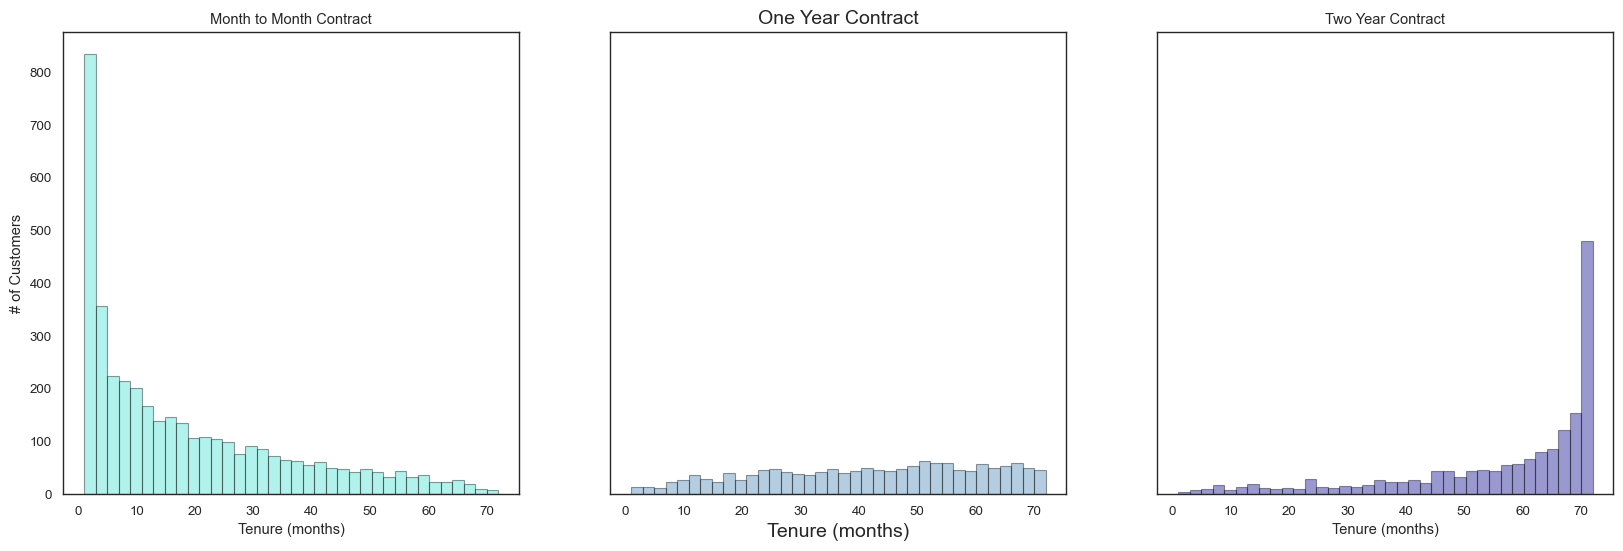

In [138]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

In [143]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Create subplots
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=('Month to Month Contract', 'One Year Contract', 'Two Year Contract'),
    shared_yaxes=True
)

# Month-to-month contract
month_to_month_data = df[df['Contract']=='Month-to-month']['tenure']
counts1, bins1 = np.histogram(month_to_month_data, bins=int(180/5))
fig.add_trace(
    go.Bar(
        x=bins1[:-1],
        y=counts1,
        name='Month-to-month',
        marker_color='turquoise',
        marker_line_color='black',
        marker_line_width=1
    ),
    row=1, col=1
)

# One year contract
one_year_data = df[df['Contract']=='One year']['tenure']
counts2, bins2 = np.histogram(one_year_data, bins=int(180/5))
fig.add_trace(
    go.Bar(
        x=bins2[:-1],
        y=counts2,
        name='One year',
        marker_color='steelblue',
        marker_line_color='black',
        marker_line_width=1
    ),
    row=1, col=2
)

# Two year contract
two_year_data = df[df['Contract']=='Two year']['tenure']
counts3, bins3 = np.histogram(two_year_data, bins=int(180/5))
fig.add_trace(
    go.Bar(
        x=bins3[:-1],
        y=counts3,
        name='Two year',
        marker_color='darkblue',
        marker_line_color='black',
        marker_line_width=1
    ),
    row=1, col=3
)

# Update layout
fig.update_layout(
    height=600,
    width=1200,
    showlegend=False,
    title_text="Customer Tenure Distribution by Contract Type"
)

# Update x and y axis labels
fig.update_xaxes(title_text="Tenure (months)")
fig.update_yaxes(title_text="# of Customers", row=1, col=1)

fig.show()

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

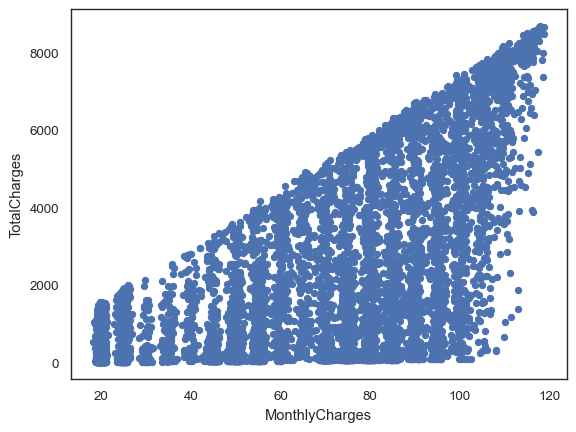

In [145]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                     y='TotalCharges')

In [146]:
import plotly.express as px

fig = px.scatter(df, x='MonthlyCharges', y='TotalCharges', 
                 title='Monthly Charges vs Total Charges',
                 width=800, height=400)
fig.show()

In [148]:
import plotly.express as px

fig = px.box(df, x='Churn', y='tenure', 
             title='Customer Tenure by Churn Status',
             width=800, height=400)
fig.show()

In [293]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasInternet
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,True
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True


In [294]:
# Create df1 by dropping HasInternet column (if present)

if 'HasInternet' in df.columns:
    df1 = df.drop(columns=['HasInternet'])
    print('df1 created. Dropped column: HasInternet')
else:
    df1 = df.copy()
    print('df1 created. Column HasInternet not found; nothing dropped.')


df1 created. Dropped column: HasInternet


--------------------------------------------------------------------------------

In [295]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [296]:
df2 = df1.apply(lambda x: object_to_int(x))
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [297]:
plt.figure(figsize=(14,7))
df2.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [298]:
# X = df2.drop(columns = ['Churn','StreamingTV','StreamingMovies'])
# y = df2['Churn'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) 
# #startify is verry very important here




In [299]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [300]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [301]:
# Iterate through different values of n_neighbors
for n in range(1, 44, 2):
    knn_model = KNeighborsClassifier(n_neighbors = n, metric='manhattan')
    knn_model.fit(X_train, y_train)
    predicted_y = knn_model.predict(X_test)
    accuracy_knn = knn_model.score(X_test, y_test)
    print(f"KNN accuracy with n_neighbors = {n}: {accuracy_knn}")

KNN accuracy with n_neighbors = 1: 0.7194312796208531
KNN accuracy with n_neighbors = 3: 0.7502369668246446
KNN accuracy with n_neighbors = 5: 0.7587677725118483
KNN accuracy with n_neighbors = 7: 0.7606635071090048
KNN accuracy with n_neighbors = 9: 0.7654028436018957
KNN accuracy with n_neighbors = 11: 0.7753554502369668
KNN accuracy with n_neighbors = 13: 0.7848341232227488
KNN accuracy with n_neighbors = 15: 0.7800947867298578
KNN accuracy with n_neighbors = 17: 0.7744075829383886
KNN accuracy with n_neighbors = 19: 0.7767772511848341
KNN accuracy with n_neighbors = 21: 0.776303317535545
KNN accuracy with n_neighbors = 23: 0.7796208530805687
KNN accuracy with n_neighbors = 25: 0.7834123222748816
KNN accuracy with n_neighbors = 27: 0.7815165876777251
KNN accuracy with n_neighbors = 29: 0.7834123222748816
KNN accuracy with n_neighbors = 31: 0.7890995260663507
KNN accuracy with n_neighbors = 33: 0.7886255924170616
KNN accuracy with n_neighbors = 35: 0.7881516587677725
KNN accuracy wit

In [302]:
knn_model = KNeighborsClassifier(n_neighbors = 31, metric='manhattan')
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7890995260663507


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1549
           1       0.61      0.57      0.59       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.79      0.79      0.79      2110



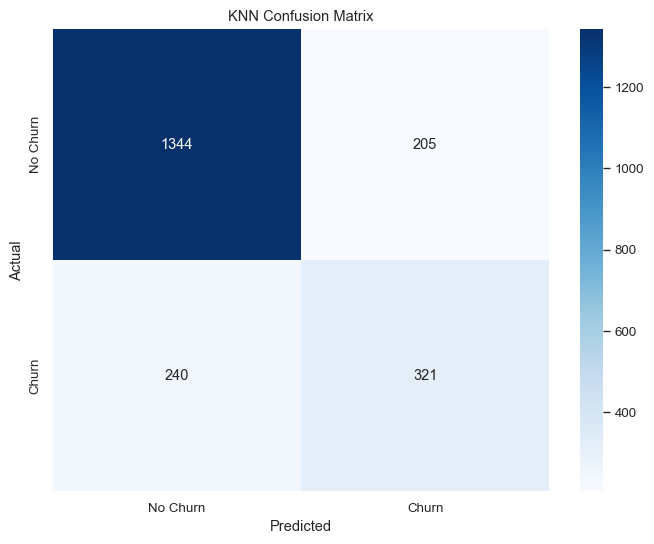

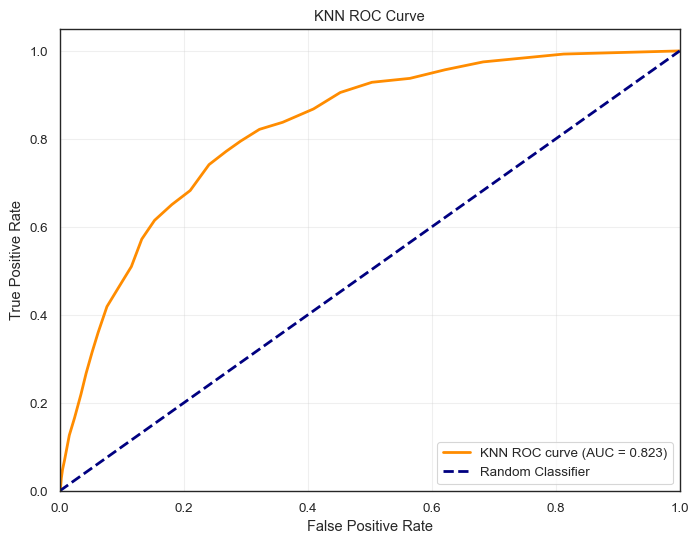

KNN AUC Score: 0.823


In [303]:
# KNN classification report
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

print("KNN Classification Report:")
print(classification_report(y_test, predicted_y))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, predicted_y)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'KNN ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"KNN AUC Score: {auc_score:.3f}")

In [304]:
svc_model = SVC(random_state = 42)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7900473933649289


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



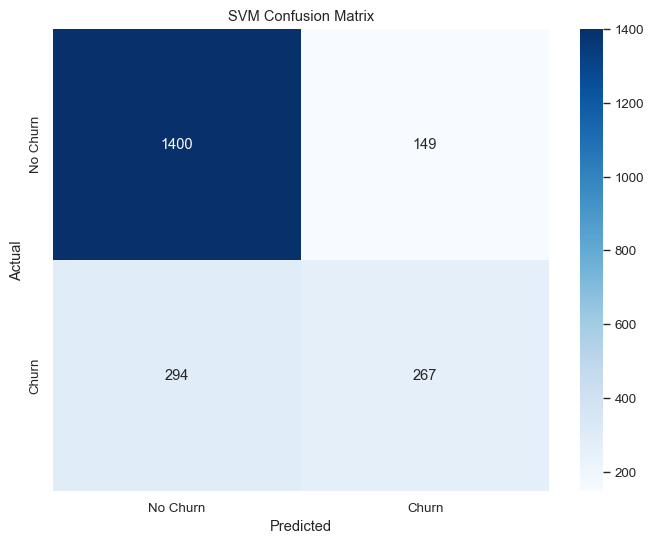

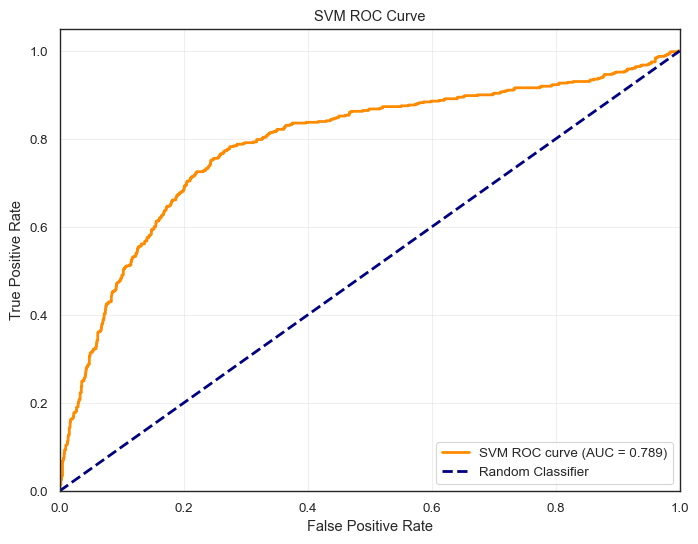

SVM AUC Score: 0.789


In [305]:
# SVM Classification Report
print("SVM Classification Report:")
print(classification_report(y_test, predict_y))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, predict_y)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# For ROC Curve, we need probability scores, so let's create a new SVM model with probability=True
svc_model_prob = SVC(random_state=42, probability=True)
svc_model_prob.fit(X_train, y_train)
y_pred_proba_svm = svc_model_prob.predict_proba(X_test)[:, 1]

# ROC Curve and AUC
auc_score_svm = roc_auc_score(y_test, y_pred_proba_svm)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {auc_score_svm:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"SVM AUC Score: {auc_score_svm:.3f}")

----------Random Forest-----------------

In [306]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'max_leaf_nodes': range(10, 101, 10),
    'n_estimators': range(100, 1001, 100)
}

# Create a RandomForestClassifier model
rf_model_gs = RandomForestClassifier( oob_score = True, n_jobs = -1,
                                  random_state =42, max_features = "sqrt",)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model_gs, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

Best parameters found:  {'max_leaf_nodes': 50, 'n_estimators': 200}
Best cross-validation accuracy:  0.8069889810573232


In [307]:
model_rf = RandomForestClassifier(n_estimators=200 , oob_score = True, n_jobs = -1,
                                  random_state =42, max_features = "sqrt",
                                  max_leaf_nodes = 50)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7886255924170616


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1549
           1       0.64      0.46      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.77      0.79      0.78      2110



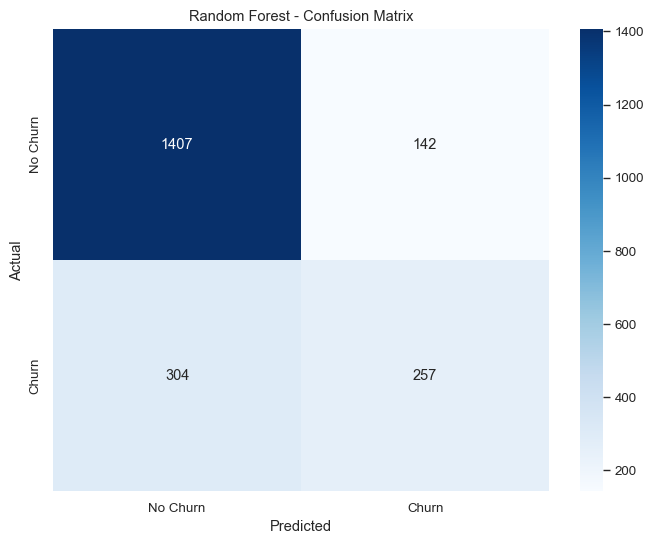

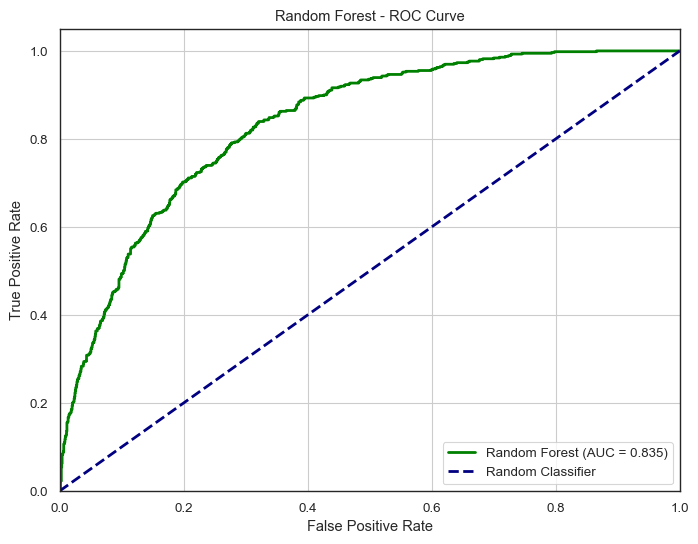

Random Forest AUC Score: 0.835


In [308]:
# Classification Report
from sklearn.metrics import classification_report
print("Random Forest Classification Report:")
print(classification_report(y_test, prediction_test))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_rf = confusion_matrix(y_test, prediction_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['No Churn', 'Churn'], 
           yticklabels=['No Churn', 'Churn'])
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities for positive class
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
auc_score_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {auc_score_rf:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Random Forest AUC Score: {auc_score_rf:.3f}")

In [309]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8014218009478673


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.56      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



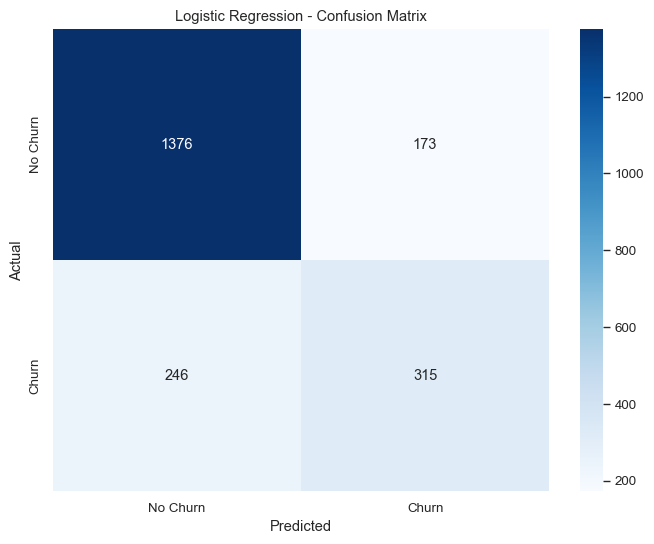

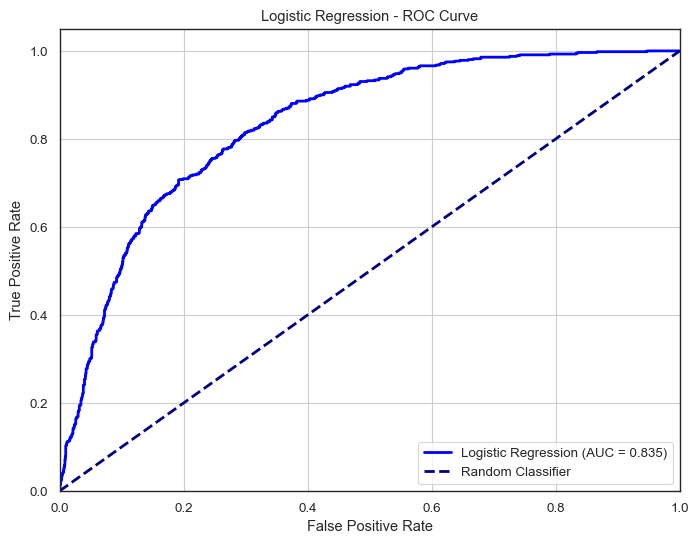

Logistic Regression AUC Score: 0.835


In [310]:
# Logistic Regression - Classification Report
from sklearn.metrics import classification_report

lr_predictions = lr_model.predict(X_test)
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, lr_predictions))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_lr = confusion_matrix(y_test, lr_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['No Churn', 'Churn'], 
           yticklabels=['No Churn', 'Churn'])
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities for positive class
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
auc_score_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_score_lr:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Logistic Regression AUC Score: {auc_score_lr:.3f}")

In [311]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7421800947867299


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1549
           1       0.52      0.52      0.52       561

    accuracy                           0.74      2110
   macro avg       0.67      0.67      0.67      2110
weighted avg       0.74      0.74      0.74      2110



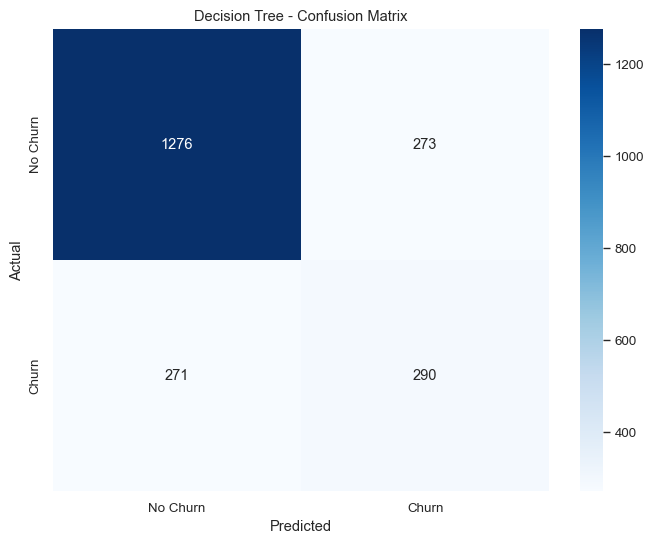

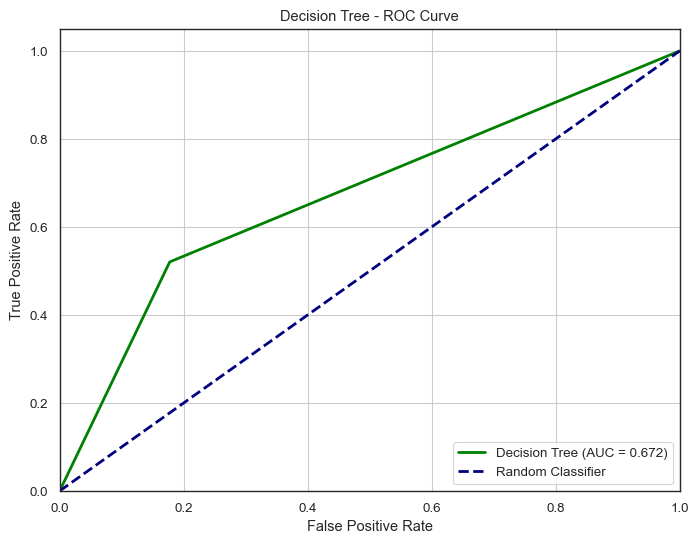

Decision Tree AUC Score: 0.672


In [312]:
# Classification Report for Decision Tree
from sklearn.metrics import classification_report
print("Decision Tree Classification Report:")
print(classification_report(y_test, predictdt_y))

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, predictdt_y)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['No Churn', 'Churn'], 
           yticklabels=['No Churn', 'Churn'])
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC for Decision Tree
# Get prediction probabilities for positive class
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
auc_score_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {auc_score_dt:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Decision Tree AUC Score: {auc_score_dt:.3f}")

In [313]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.7867298578199052

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1549
           1       0.61      0.55      0.58       561

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.79      0.78      2110



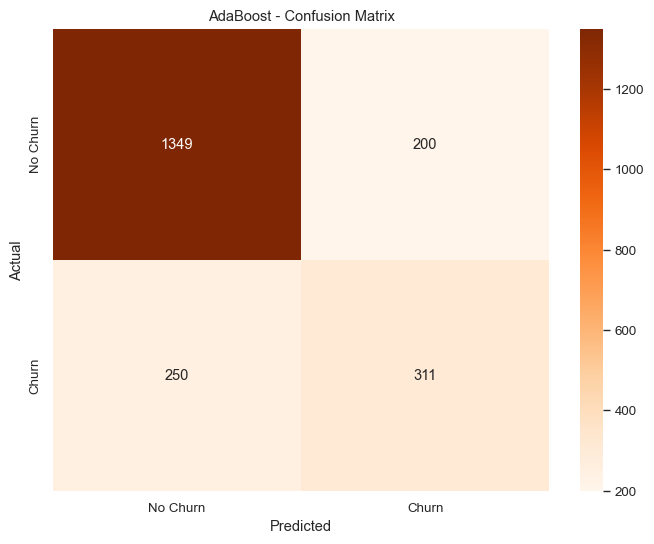

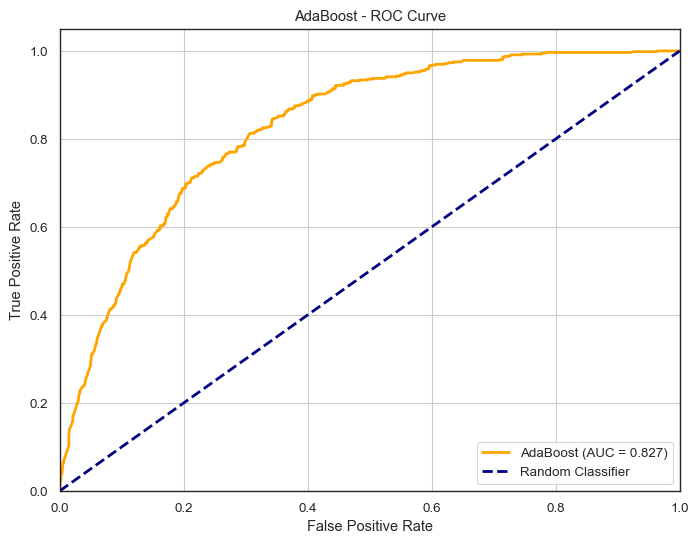

AdaBoost AUC Score: 0.827


In [314]:
# Classification Report for AdaBoost
print("AdaBoost Classification Report:")
print(classification_report(y_test, a_preds))

# Confusion Matrix for AdaBoost
cm_ada = confusion_matrix(y_test, a_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Oranges', 
           xticklabels=['No Churn', 'Churn'], 
           yticklabels=['No Churn', 'Churn'])
plt.title('AdaBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC for AdaBoost
# Get prediction probabilities for positive class
y_pred_proba_ada = a_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_proba_ada)
auc_score_ada = auc(fpr_ada, tpr_ada)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, color='orange', lw=2, label=f'AdaBoost (AUC = {auc_score_ada:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost - ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AdaBoost AUC Score: {auc_score_ada:.3f}")

In [315]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.7971563981042654


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.51      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



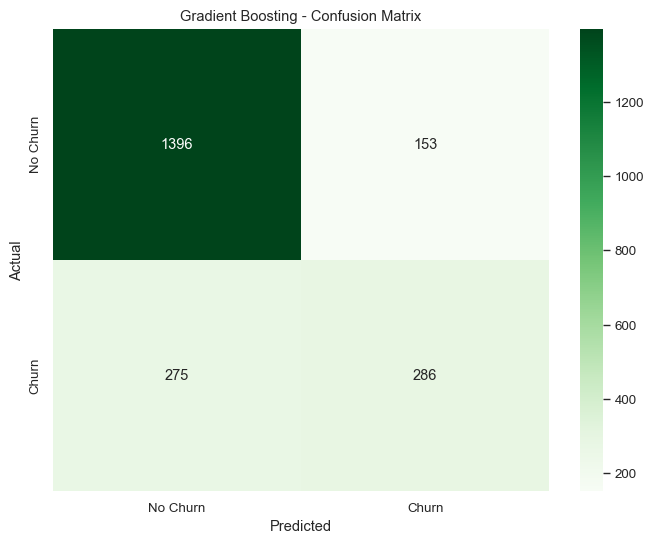

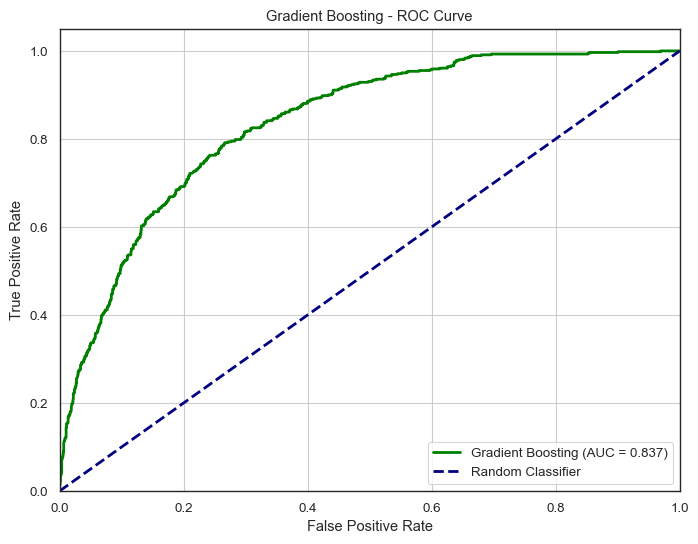

Gradient Boosting AUC Score: 0.837


In [316]:
# Classification Report for Gradient Boosting
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))

# Confusion Matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, gb_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens', 
           xticklabels=['No Churn', 'Churn'], 
           yticklabels=['No Churn', 'Churn'])
plt.title('Gradient Boosting - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC for Gradient Boosting
# Get prediction probabilities for positive class
y_pred_proba_gb = gb.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_proba_gb)
auc_score_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label=f'Gradient Boosting (AUC = {auc_score_gb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting - ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Gradient Boosting AUC Score: {auc_score_gb:.3f}")

In [317]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression(max_iter=1000)
clf3 = AdaBoostClassifier()
clf4 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=31, metric='manhattan'))
clf5 = RandomForestClassifier(n_estimators=200, oob_score=True, n_jobs=-1, random_state=1, max_features="sqrt", max_leaf_nodes=50)
clf6 = make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))

eclf1 = VotingClassifier(
    estimators=[('gbc', clf1), ('lr', clf2),  ('knn', clf4)],
    voting='soft'
)
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score")
print(accuracy_score(y_test, predictions))

Final Accuracy Score
0.8004739336492891


Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.64      0.56      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



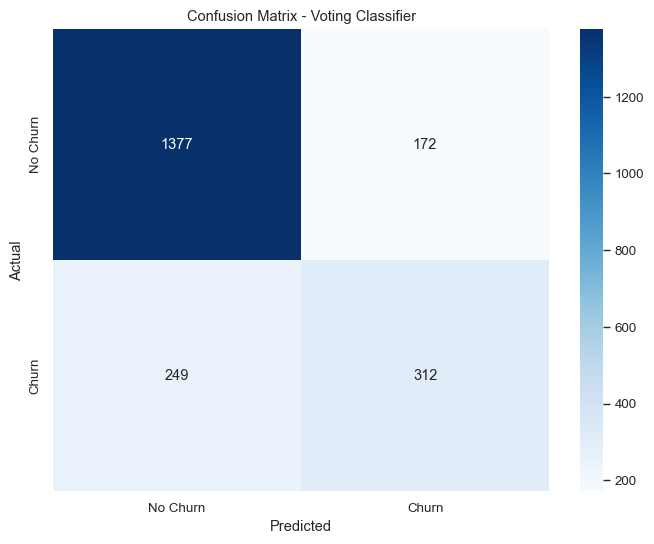

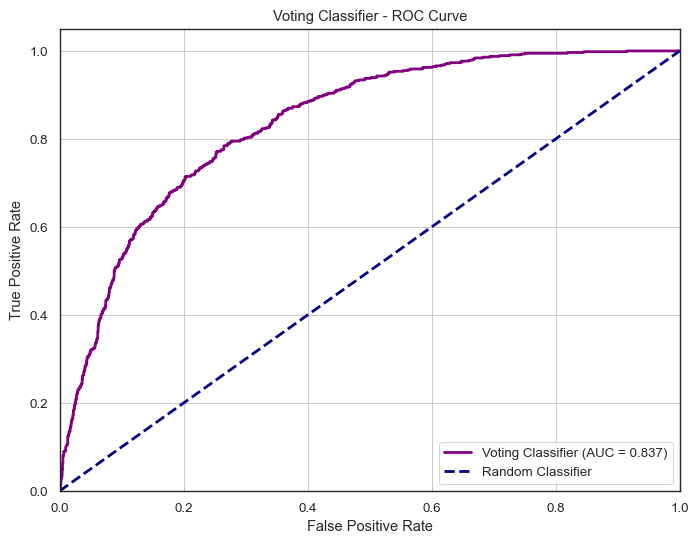

Voting Classifier AUC Score: 0.837


In [318]:
# Classification Report
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

print("Classification Report for Voting Classifier:")
print(classification_report(y_test, predictions))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Voting Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve and AUC for Voting Classifier
# Get prediction probabilities for positive class
y_pred_proba_voting = eclf1.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_pred_proba_voting)
auc_score_voting = auc(fpr_voting, tpr_voting)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, color='purple', lw=2, label=f'Voting Classifier (AUC = {auc_score_voting:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Voting Classifier - ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Voting Classifier AUC Score: {auc_score_voting:.3f}")

Best models in this approach--
Voting classifier-- accuracy-0.8005 , f1-0.60 , AUC-0.837.
Logistic regression-- accuracy-0.8014 , f1-0.60 , AUC-0.835.
